<a href="https://colab.research.google.com/github/Pharmafairy/DictionarySkill/blob/master/Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load, Analyse, Extract Features and Preprocess Data

In this section the original data is loaded, analyzed, features are extracted and then the data is getting preprocessed.

List of added columns through feature extraction: 'is_E','is_S','is_T','is_J', 'avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions' , 'hashtags', 'video_links', 'image_links', 'other_links'.
The resulting data is saved as "processed_data.csv".

Preprocessing is done for the 'posts' columns and includes: converting to lowercase, replacing abreviations, handling of apostrophes, removal of mention of MBTI, splitting into sentences, removal on non-words, lemmatization with POS tagging, removal of stopwords and stemming.

The resulting data is saved as "**dataset_stem.csv**".

## Load data

In [34]:
######################    LOAD DATA     ##################################
import requests
import io
import pandas as pd
import numpy as np
from numpy import loadtxt

# load file
file = open('/content/mbti_1.csv', 'r') #https://www.kaggle.com/datasnaek/mbti-type/download/NMJlht2pESGK2KiHOBMp%2Fversions%2F2voXRdiDtjj2xxUSs3eY%2Ffiles%2Fmbti_1.csv
csv = pd.read_csv(file)

#csv.columns = ["type", "posts"]
types = csv['type'].unique()
types = types.tolist()
posts = csv['posts']

## Analyse data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None
type                                                  INFJ
posts    'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
Name: 0, dtype: object
csv: 
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
posts: 
'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not

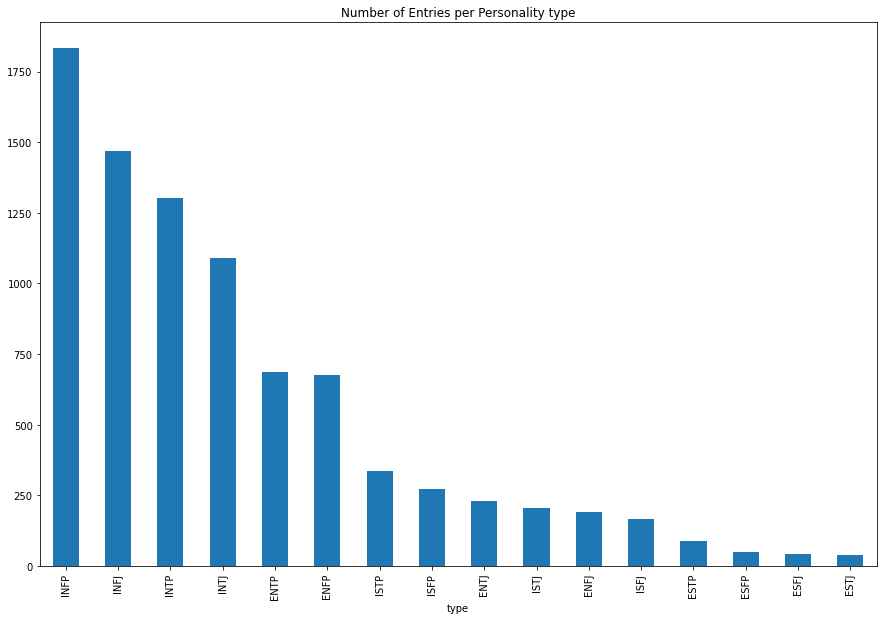

<Figure size 1080x720 with 0 Axes>

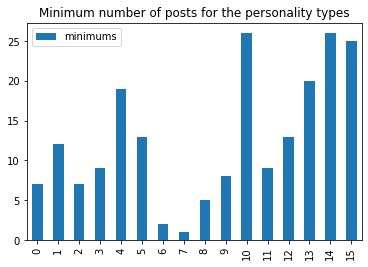

<Figure size 1080x720 with 0 Axes>

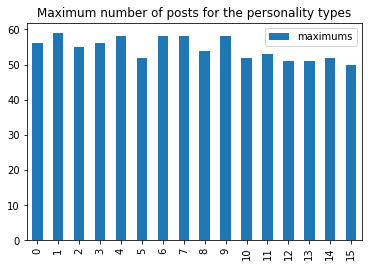

<Figure size 1080x720 with 0 Axes>

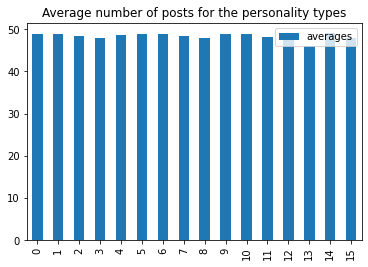

<Figure size 1080x720 with 0 Axes>

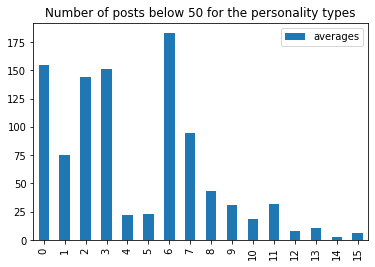

In [101]:
print(csv.info())
print(csv.iloc[0])
print("csv: ")
print(csv.head())
print("posts: ")
print(posts[0])
print("type: ")
print(format(types))

import seaborn as sns
from matplotlib import pyplot as plt

df = csv.copy()

print("=====================================")
print("SHAPE")
print(df.info())

print()
print("=====================================")
print("HEAD OF DATASET")
print(df.head())

print()

print("=====================================")
print("DISTRIBUTION")
gr = df.groupby('type').count()
print(gr)
gr.sort_values("posts", ascending=False, inplace=True)
plt.figure(figsize=(15,10))
gr['posts'].plot(kind='bar',title="Number of Entries per Personality type")

#df["LenP"] = df["posts"].apply(len)
#sns.distplot(df["LenP"]).set_title("Distribution of Lengths of all 50 Posts");

# add number of posts
#df['num_posts'] = df['posts'].apply(lambda x: len(re.split(r'\|\|\|+', x)) ))

print("=====================================")
print("MAX, MIN AND AVERAGE AMOUNT OF POSTS PER USER/ENTRY")
max = 0
min = 100000
cnt = 0
avg = 0
number_of_posts_below_avg = 0

for entry in df['posts']:
  cnt = cnt + 1

  val = len(re.split(r'\|\|\|+', entry))

  avg = avg + val

  if val > max :
    max = val
  if val < min :
    min = val

  if val < 50 :
    number_of_posts_below_avg = number_of_posts_below_avg + 1

avg = avg / cnt

print("Min: ", min)
print("Max: ", max)
print("Avg: ", avg)


print("=====================================")
print("MAX, MIN AND AVERAGE AMOUNT OF POSTS PER TYPE")

minimums = []
maximums = []
averages = []
num_below_avg = []
# types = list of types
for persType in types :

  df_type = df.loc[df['type'] == persType]

  max = 0
  min = 100000
  cnt = 0
  avg = 0
  number_of_posts_below_avg = 0

  for entry in df_type['posts']:
     cnt = cnt + 1

     val = len(re.split(r'\|\|\|+', entry))

     avg = avg + val

     if val > max :
       max = val
     if val < min :
       min = val

     if val < 50 :
       number_of_posts_below_avg = number_of_posts_below_avg + 1
  avg = avg / cnt

  minimums.append(min)
  maximums.append(max)
  averages.append(avg)
  num_below_avg.append(number_of_posts_below_avg)


minimums_df = pd.DataFrame({'type': types, 'minimums': minimums})
maximums_df = pd.DataFrame({'type': types, 'maximums': maximums})
averages_df = pd.DataFrame({'type': types, 'averages': averages})
below_df = pd.DataFrame({'type': types, 'averages': num_below_avg})

gr = minimums_df
plt.figure(figsize=(15,10))
gr.plot(kind='bar',title="Minimum number of posts for the personality types")

gr = maximums_df
plt.figure(figsize=(15,10))
gr.plot(kind='bar',title="Maximum number of posts for the personality types")

gr = averages_df
plt.figure(figsize=(15,10))
gr.plot(kind='bar',title="Average number of posts for the personality types")

gr = below_df
plt.figure(figsize=(15,10))
gr.plot(kind='bar',title="Number of posts below 50 for the personality types")

In [98]:
test = "this is ||| a test string ||| should be 4 posts |||||| not 5"
print(len(re.split(r'\|\|\|+', test)))

4


## Feature Extraction

In [ ]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

delimiters = '(\s+|\s*,\s*)'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

regex_punctuation = r"(,|\.+|!|\?)"
regex_links = r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"


# extracts features from posts of dataframe and adds them to csv
def extract_features(df):
  print("Counting meta data..."),
  cnt = 0 # counts rows

  # make arrays to add later
  video_links = []
  image_links = []
  other_links = []
  mentions = []
  hashtags = []
  avg_chars = []
  avg_words = []
  avg_cap_words = []
  avg_punctuation = []
  avg_capslock_words = []

  for row in df.itertuples():
    x_tweets = (row.posts).split('|||')
    video_links.append(0)
    image_links.append(0)
    other_links.append(0)
    mentions.append(0)
    hashtags.append(0)
    avg_chars.append(0)
    avg_words.append(0)
    avg_cap_words.append(0)
    avg_punctuation.append(0)
    avg_capslock_words.append(0)

    video_links[cnt], image_links[cnt], other_links[cnt], mentions[cnt], hashtags[cnt], avg_chars[cnt], avg_words[cnt], avg_cap_words[cnt], avg_capslock_words[cnt], avg_punctuation[cnt] = extract_from_user(x_tweets)

    cnt = cnt+1

  # add to csv
  df['avg_chars'] = avg_chars
  df['avg_words'] = avg_words
  df['avg_cap_words'] = avg_cap_words
  df['avg_capslock_words'] = avg_capslock_words
  df['avg_punctuation'] = avg_punctuation
  df['mentions'] = mentions
  df['hashtags'] = hashtags
  df['video_links'] = video_links
  df['image_links'] = image_links
  df['other_links'] = other_links

  df.columns = ['type', 'posts', 'is_E','is_S','is_T','is_J', 'avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions' , 'hashtags', 'video_links', 'image_links', 'other_links']
  
  print("finished")

# returns url count for videos, images and other links
def count_urls(df):
  image_regex = r"(.*\.(jpg|png|gif)$|https:\/\/t\.co\/.*)"
  videos_regex = r".*(youtube|youtu.be|vimeo|dailymotion|jetpack|twitch).*"
  urls = re.findall(regex_links,df)
  cnt_images = 0
  cnt_videos = 0
  cnt_other = 0
  for url in urls:
    if re.match(image_regex, str(url)):
      cnt_images += 1
    elif re.match(videos_regex, str(url)):
      cnt_videos += 1
    else:
      cnt_other += 1
  return cnt_videos, cnt_images, cnt_other

# splits off the types into 4 categories
def split_types(mbtitypes_all):
  print("Splitting 16 personality types into E/I, S/N, T/F, J/P..."),
  mbtitypes_all['is_E'] = mbtitypes_all['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
  mbtitypes_all['is_S'] = mbtitypes_all['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
  mbtitypes_all['is_T'] = mbtitypes_all['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
  mbtitypes_all['is_J'] = mbtitypes_all['type'].apply(lambda x: 1 if x[3] == 'J' else 0)
  mbtitypes_all.columns = ['type', 'posts', 'is_E','is_S','is_T','is_J']
  print("finished")
  return mbtitypes_all

In [ ]:
feature_data = csv

split_types(feature_data)                       # split types into E/I, N/S, T/F, J/P
count_meta_data(feature_data)                   # count for video links, image links, other links, @mentions, #hastags, emojis, avg characters per tweet, avg words per tweet, fully capitalized words count, first letter capitilized count, punctiuation count

## Preprocess and save

In [ ]:
######################    EXTRACT AND CLEANUP     ##################################

import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

delimiters = '(\s+|\s*,\s*)'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

regex_punctuation = r"(,|\.+|!|\?)"
regex_links = r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"


def handle_apostrophy(df):
  print("Converting words with apostrophies..."),
  
  # find words with missing apostrophies and replace directly
  df["posts"] = df['posts'].str.replace(r'\bim\b', 'i am')
  df["posts"] = df['posts'].str.replace(r'\bive\b', 'i have')
  df["posts"] = df['posts'].str.replace(r'\bweve\b', 'we have') 
  df["posts"] = df['posts'].str.replace(r'\btheyve\b', 'they have')      
  df["posts"] = df['posts'].str.replace(r'\bim\b', 'i am')                      
  df["posts"] = df['posts'].str.replace(r'\byoure\b', 'you are')  
  df["posts"] = df['posts'].str.replace(r'\bwere\b', 'we are')  
  df["posts"] = df['posts'].str.replace(r'\btheyre\b', 'they are') 
  df["posts"] = df['posts'].str.replace(r'\byoull\b', 'you will')  
  df["posts"] = df['posts'].str.replace(r'\bitll\b', 'it will')  
  df["posts"] = df['posts'].str.replace(r'\btheyll\b', 'they will')    
  df["posts"] = df['posts'].str.replace(r'\bhes got\b', 'he has got')  
  df["posts"] = df['posts'].str.replace(r'\bshes got\b', 'she has got') 
  df["posts"] = df['posts'].str.replace(r'\bits got\b', 'it has got')   
  df["posts"] = df['posts'].str.replace(r'\bhes been\b', 'he has been')  
  df["posts"] = df['posts'].str.replace(r'\bshes been\b', 'she has been') 
  df["posts"] = df['posts'].str.replace(r'\bits been\b', 'it has been')
  df["posts"] = df['posts'].str.replace(r'\bhes\b', 'he is')  
  df["posts"] = df['posts'].str.replace(r'\bshes\b', 'she is')
  df["posts"] = df['posts'].str.replace(r'\byoud\b', 'you would')
  df["posts"] = df['posts'].str.replace(r'\bhed\b', 'he would')
  df["posts"] = df['posts'].str.replace(r'\bitd\b', 'it would')
  df["posts"] = df['posts'].str.replace(r'\btheyd\b', 'they would')
  # well, shell, hell, its, shed, id, wed -> are words too, so no replacing 

  # replace apostrophies and word after with suited word
  regex_have = r"\'ve"
  regex_am = r"\'m"
  regex_has = r"(?<=(he|it))'s got"
  regex_is = r"\'s"                                                             # has to be after regex_has
  regex_are = r"\'re"
  regex_will = r"\'ll"
  regex_would = r"\'d"

  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_have, " have", x))     # replace 've with have
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_am, " am", x))         # replace 'm with am
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_has, " has got", x))   # replace 's with has got
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_is, " is", x))         # replace 's with is
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_are, " re", x))        # replace 're with are
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_will, " will", x))     # replace 'll with will
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_would, " would", x))   # replace 'd with would

  print("finished")

def handle_abrevs(df):
  print("Replacing \"gotta\" with \"going to\"..."),
  df["posts"] = df['posts'].str.replace('gotta', 'got to')                      # replace gotta with got to
  df["posts"] = df['posts'].str.replace('gonna', 'going to')                    # replace gotta with going to
  df["posts"] = df['posts'].str.replace('wanna', 'want to')                     # replace gotta with going to
  df["posts"] = df['posts'].str.replace('\bu\b', 'you')                         # replace u with you
  print("finished")

# def remove_stopwords(data_no_stopwords):
#   print("Removing stopwords from tweets..."),
#   # Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
#   data_no_stopwords['posts'] = data_no_stopwords['posts'].apply(lambda x: ' '.join([word for word in re.split(delimiters, x) if word not in (stop_words)]))
#   print("finished")

#only run after text was converted to lowercase
def remove_type_mentioning(data_no_typementioning):
  print("Removing mention of the MBTI types..."),
  types_lowercase = [element.lower() for element in types]
  types_plural = [element+"s" for element in types_lowercase]
  # Exclude mbti typed with Python's list comprehension and pandas.DataFrame.apply.
  data_no_typementioning['posts'] = data_no_typementioning['posts'].apply(lambda x: ' '.join([word for word in re.split(delimiters, x) if word not in (types_lowercase)]))
  data_no_typementioning['posts'] = data_no_typementioning['posts'].apply(lambda x: ' '.join([word for word in re.split(delimiters, x) if word not in (types_plural)]))
  print("finished")

# def cleanup_tweets(sentence):
#   print("Removing links, punctuation, hashtags and extra spaces..."),
#   df["posts"] = df["posts"].apply(lambda x: re.sub(regex_links,'',x))           # links
#   df["posts"] = df["posts"].apply(lambda x: re.sub(r'#\w+','',x))               # full hashtags
#   #df["posts"] = df["posts"].apply(lambda x: re.sub(regex_punctuation,'',x))    # punctuation -> gets removed with next line anway
#   df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s\|]','',x))      # not words, except |
#   df['posts'] = df['posts'].str.replace(r'\s\s+', ' ')                          # extra spaces
#   print("finished")

def make_lowercase(df):
  print("Converting to lowercase..."),
  df['posts'] = df['posts'].str.lower()
  print("finished")

def split_and_clean(df):
  print("Splitting sentences and cleaning up..."),
  list_of_posts = []
  for post in df["posts"]:
    post = re.sub(regex_links, '', post)                                        # remove links
    post = re.sub(r'#\w+', '', post)                                            # remove full #hashtags
    post = re.sub(r'@\w+', '', post)                                            # remove @names
    post = re.split(r";|:|\.|\|\|\|", post)                                     # split to sentences
    
    post = [re.sub(r'[^a-zA-Z\s]', '', p) for p in post]                        # remove not-words
    post = [re.sub(r'\s\s+', ' ', p) for p in post]                             # remove extra spaces
    post = [re.sub(r'(^\s+|\s+$)', '', p) for p in post]                        # remove extra spaces
    post = [x for x in post if x.strip()]                                       # remove empty strings in the list

    post = '|||'.join(post)                                                     # re-add seperator |||
    list_of_posts.append(post)
  df["posts"] = list_of_posts
  print("finished")

In [ ]:
processed_data = feature_data

make_lowercase(processed_data)                    # make lowercase
handle_abrevs(processed_data)                     # replace abreviations
handle_apostrophy(processed_data)                 # handle apostrophies (e.g. "you're" -> "you are")
remove_type_mentioning(processed_data)            # replace mention of mbti type with x
split_and_clean(processed_data)                   # split into list of sentences at punctuation (. : ||| ;)

# save processed_data as csv
processed_data.columns = processed_data.columns.str.strip()
processed_data.to_csv(r'processed_data.csv', index = False)

### Show processed data

In [ ]:
# show processed data
print(processed_data.head())

print("NEW DISTRIBUTION")

distribution_df = pd.DataFrame()
distribution_df['Type'] = ['E', 'I', 'S', 'N', 'T', 'F', 'J', 'P']
E = processed_data.loc[processed_data.is_E == 1, 'is_E'].count()
I = processed_data.loc[processed_data.is_E == 0, 'is_E'].count()
S = processed_data.loc[processed_data.is_S == 1, 'is_S'].count()
N = processed_data.loc[processed_data.is_S == 0, 'is_S'].count()
T = processed_data.loc[processed_data.is_T == 1, 'is_T'].count()
F = processed_data.loc[processed_data.is_T == 0, 'is_T'].count()
J = processed_data.loc[processed_data.is_J == 1, 'is_J'].count()
P = processed_data.loc[processed_data.is_J == 0, 'is_J'].count()
distribution_df['Num'] = [E, I, S, N, T, F, J, P]
distribution_df.columns = ['Type', 'Num']
distribution_df.index = ['E', 'I', 'S', 'N', 'T', 'F', 'J', 'P']

print(E)
print(S)
print(T)
print(J)

new_gr = distribution_df
plt.figure(figsize=(15,10))
new_gr['Num'].plot(kind='bar',title="Number of Entries per Personality type")

## lemmatize and stem and save

In [27]:
import nltk
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
import pandas as pd
import re
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import wordnet

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lancaster=LancasterStemmer()
porter = PorterStemmer()


# Does position tagging for one word
def do_pos_tagging(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    #print("Tag: "+tag)
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    # tag_dict = {'ADJ':['JJ','JJR','JJS'], 'ADP':['EX','TO'], 'ADV':['RB','RBR','RBS','WRB'], 'CONJ':['CC','IN'],'DET':['DT','PDT','WDT'],
    #           'NOUN':['NN','NNS','NNP','NNPS'], 'NUM':['CD'],'PRT':['RP'],'PRON':['PRP','PRP$','WP','WP$'],
    #           'VERB':['MD','VB','VBD','VBG','VBN','VBP','VBZ'],'.':['#','$',"''",'(',')',',','.',':'],'X':['FW','LS','UH']}

    return tag_dict.get(tag, wordnet.NOUN)

# # Defining a Function to clean up the reviews 
# def text_preprocess(ds: pd.Series) -> pd.Series:
#     """
#     Apply NLP Preprocessing Techniques to the reviews.
#     """
#     for m in range(len(ds)):
#         main_words = re.sub('[^a-zA-Z]', ' ', ds[m])                                          # Retain only alphabets
#         main_words = (main_words).split()

#         lem = WordNetLemmatizer()
#         main_words = [lem.lemmatize(w, do_pos_tagging(w)) for w in main_words if len(w) > 1]  # Group different forms of the same word

#         main_words = [w for w in main_words if not w in set(stopwords.words('english'))]      # Remove stopwords AFTER pos tagging!
   
#         main_words = [porter.stem(w) for w in main_words if len(w) > 1]                       # get stems
       
#         main_words = ' '.join(main_words)
#         ds[m] = main_words

#     return ds

porter = PorterStemmer()
lem = WordNetLemmatizer()

sentence = ("i am not feeling emotional emotions and it is emotionally exhausting").split()
print(sentence)

lem_sentence =  [lem.lemmatize(w, do_pos_tagging(w)) for w in sentence if len(w) > 1]
print(lem_sentence)

stopwords_sentence = [w for w in lem_sentence if not w in set(stopwords.words('english'))]
print(stopwords_sentence)

stem_sentence = [porter.stem(w) for w in stopwords_sentence if len(w) > 1] 
print(stem_sentence)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'am', 'not', 'feeling', 'emotional', 'emotions', 'and', 'it', 'is', 'emotionally', 'exhausting']
['be', 'not', 'feel', 'emotional', 'emotion', 'and', 'it', 'be', 'emotionally', 'exhaust']
['feel', 'emotional', 'emotion', 'emotionally', 'exhaust']
['feel', 'emot', 'emot', 'emot', 'exhaust']


#  Feature Importance Analysis
In this section the extracted features and analysed and only important features are going to be kept for further training.

This section results in the following params being set
* all_features : list of all features
* pa_features: included 4 lists with important features for is_E, is_S, is_T and is_J
* type_features : list of important features for the type

In [49]:
balance = 1
include_other_features = 0
scale_features = 0
only_best = 1

all_features = ['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions' , 'hashtags', 'video_links', 'image_links', 'other_links']
type_features = []
pa_features = []
role_features = []

## Load Data

In [50]:
import pandas as pd

# load file
file = open('/content/dataset_stem.csv', 'r')
dataset = pd.read_csv(file)

print(dataset.columns)

if(balance):
  # make roughly same length
  isJ = dataset.loc[dataset['is_J'] == 1].sample(frac=1).reset_index(drop=True)
  isNotJ = dataset.loc[dataset['is_J'] == 0][:3434].sample(frac=1).reset_index(drop=True)
  print("J/P lengths: "+str(len(isJ))+ " and "+str(len(isNotJ)))

  dataset_J = pd.concat([isJ, isNotJ]).reset_index()

  # make roughly same length
  isE = dataset.loc[dataset['is_E'] == 1].sample(frac=1).reset_index(drop=True)
  isNotE = dataset.loc[dataset['is_E'] == 0][:1999].sample(frac=1).reset_index(drop=True)
  print("E/I lengths: "+str(len(isE))+ " and "+str(len(isNotE)))

  dataset_E = pd.concat([isE, isNotE])

  # make roughly same length
  isS = dataset.loc[dataset['is_S'] == 1].sample(frac=1).reset_index(drop=True)
  isNotS = dataset.loc[dataset['is_S'] == 0][:1197].sample(frac=1).reset_index(drop=True)
  print("S/N lengths: "+str(len(isS))+ " and "+str(len(isNotS)))

  dataset_S = pd.concat([isS, isNotS])

  # make roughly same length
  isT = dataset.loc[dataset['is_T'] == 1].sample(frac=1).reset_index(drop=True)
  isNotT = dataset.loc[dataset['is_T'] == 0][:3981].sample(frac=1).reset_index(drop=True)
  print("T/F lengths: "+str(len(isT))+ " and "+str(len(isNotT)))

  dataset_T = pd.concat([isT, isNotT])


Index(['type', 'posts', 'is_E', 'is_S', 'is_T', 'is_J', 'avg_chars',
       'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation',
       'mentions', 'hashtags', 'video_links', 'image_links', 'other_links'],
      dtype='object')
J/P lengths: 3434 and 3434
E/I lengths: 1999 and 1999
S/N lengths: 1197 and 1197
T/F lengths: 3981 and 3981


## Feature Analysis

In [51]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### for type

scaling features
   type_encoded  avg_chars  avg_words  ...  video_links  image_links  other_links
0             8  -1.917956    -2.4256  ...     3.218299     2.520541    -0.339514

[1 rows x 11 columns]


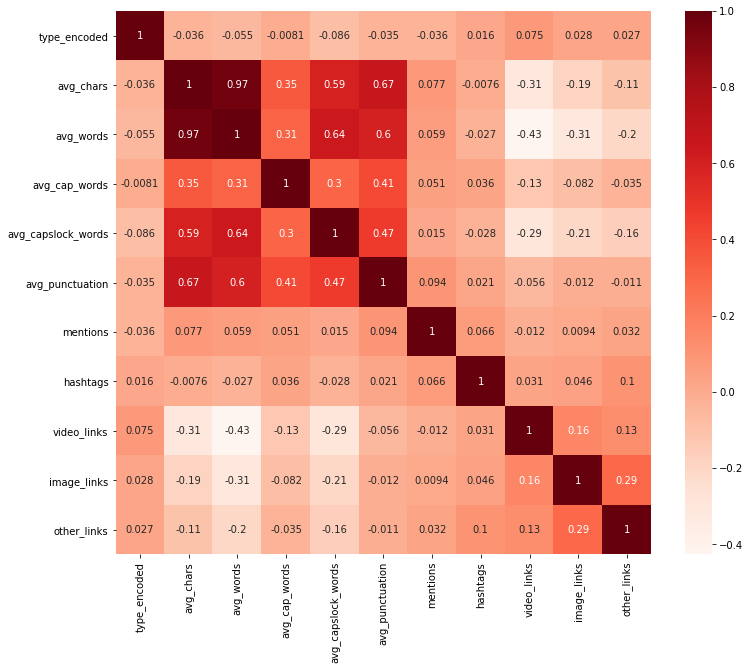

type_encoded          1.000000
avg_words             0.054922
avg_capslock_words    0.086497
video_links           0.075257
Name: type_encoded, dtype: float64
Series([], Name: type_encoded, dtype: float64)
<class 'pandas.core.series.Series'>
features
[]


In [53]:

# =======================================================================
# FOR EACH TYPE
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['type_encoded']= label_encoder.fit_transform(dataset['type']) 

y = dataset['type_encoded']
X = dataset[all_features]

print("scaling features")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_x = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

X = pd.concat([y, normalized_x], axis=1)

print(X.head(1))

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

print("=====================================")
#Correlation with output variable
cor_target = abs(cor['type_encoded'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
print(relevant_features)
relevant_features = cor_target[cor_target<-0.05]
print(relevant_features)
print(type(relevant_features))
relevant_features = relevant_features[cor_target<1.0]
type_features = relevant_features.index.values.tolist()
print("features")

print(type_features)

  # from sklearn.feature_selection import SelectFromModel
  # from sklearn.linear_model import LogisticRegression
  # logReg = LogisticRegression(C=20.0, dual=False, penalty="l2", solver="saga").fit(X, y) 
  # model = SelectFromModel(logReg, prefit=True)
  # X_new = model.transform(X)
  # feature_selection_list.append(X_new)

  # #Adding constant column of ones, mandatory for sm.OLS model
  # X_1 = sm.add_constant(X)
  # #Fitting sm.OLS model
  # model = sm.Logit(y,X_1).fit()
  # model.pvalues
  # #Backward Elimination
  # cols = list(X.columns)
  # pmax = 1
  # while (len(cols)>0):
  #     p= []
  #     X_1 = X[cols]
  #     X_1 = sm.add_constant(X_1)
  #     model = sm.Logit(y,X_1).fit()
  #     p = pd.Series(model.pvalues.values[1:],index = cols)      
  #     pmax = max(p)
  #     feature_with_p_max = p.idxmax()
  #     if(pmax>0.05):
  #         cols.remove(feature_with_p_max)
  #     else:
  #         break
  # selected_features_BE = cols
  # print(selected_features_BE)



### For Personality Aspects

including features
scaling features
CATEGORY:  is_E


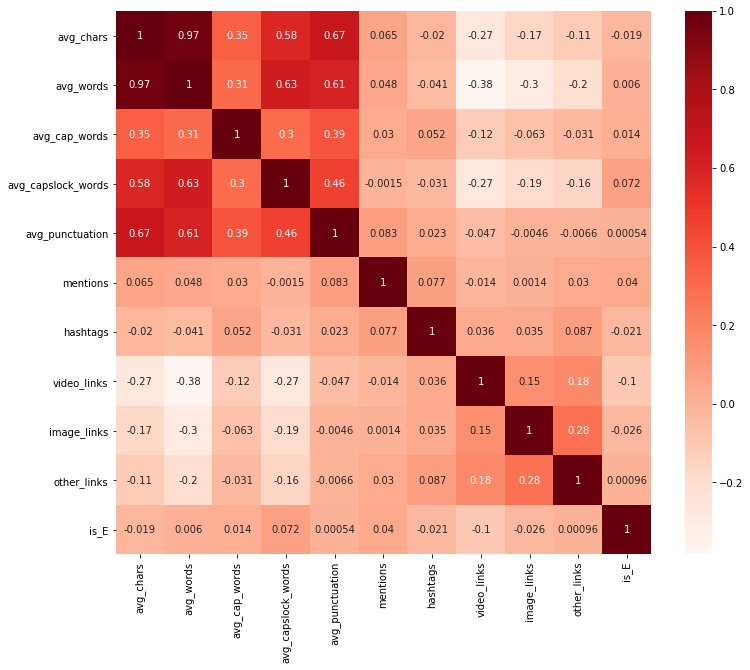

avg_capslock_words    0.072033
video_links           0.099714
is_E                  1.000000
Name: is_E, dtype: float64
Series([], Name: is_E, dtype: float64)
<class 'pandas.core.series.Series'>
features
[['avg_capslock_words', 'video_links'], ['avg_chars', 'avg_words', 'avg_punctuation'], ['avg_chars', 'avg_words', 'avg_capslock_words', 'avg_punctuation'], ['avg_chars', 'avg_cap_words'], [], [], [], [], [], [], [], [], []]
including features
scaling features
CATEGORY:  is_S


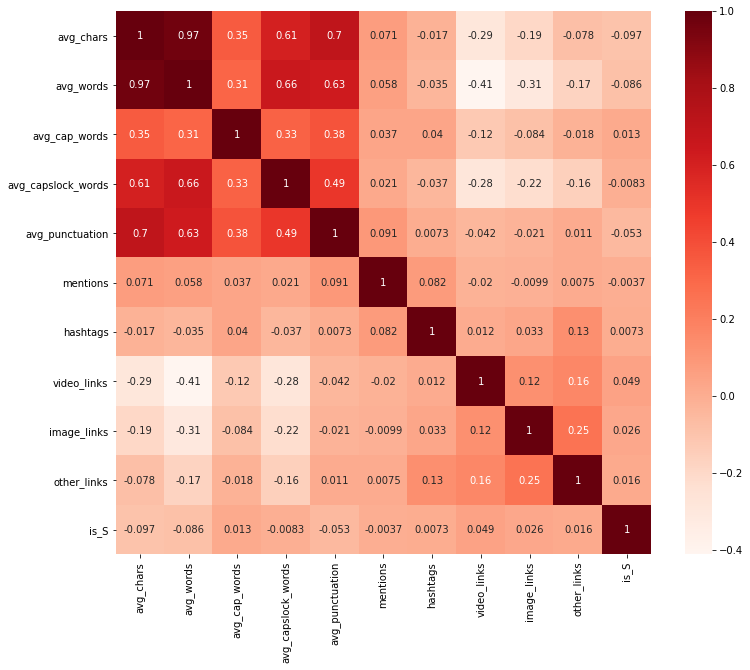

avg_chars          0.096824
avg_words          0.085895
avg_punctuation    0.053122
is_S               1.000000
Name: is_S, dtype: float64
Series([], Name: is_S, dtype: float64)
<class 'pandas.core.series.Series'>
features
[['avg_capslock_words', 'video_links'], ['avg_chars', 'avg_words', 'avg_punctuation'], ['avg_chars', 'avg_words', 'avg_capslock_words', 'avg_punctuation'], ['avg_chars', 'avg_cap_words'], [], [], [], [], [], [], [], [], [], []]
including features
scaling features
CATEGORY:  is_T


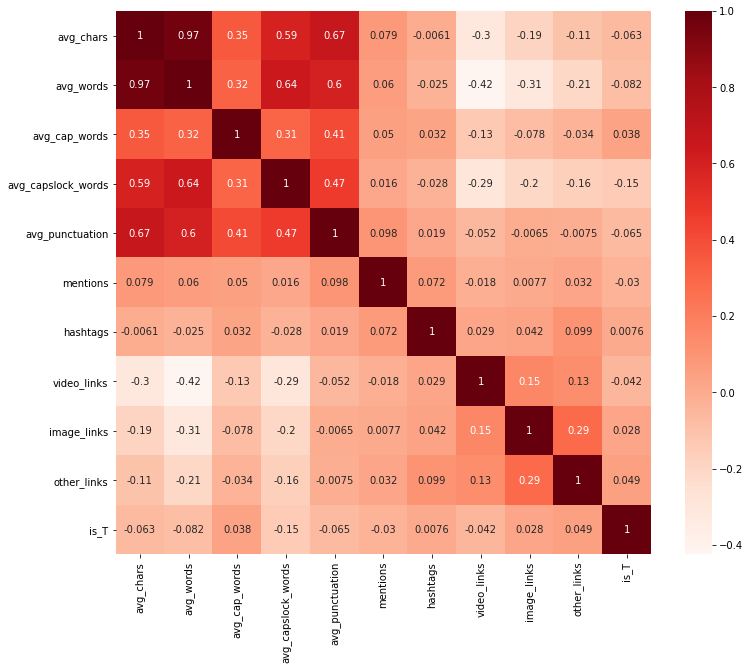

avg_chars             0.063269
avg_words             0.082423
avg_capslock_words    0.145569
avg_punctuation       0.064864
is_T                  1.000000
Name: is_T, dtype: float64
Series([], Name: is_T, dtype: float64)
<class 'pandas.core.series.Series'>
features
[['avg_capslock_words', 'video_links'], ['avg_chars', 'avg_words', 'avg_punctuation'], ['avg_chars', 'avg_words', 'avg_capslock_words', 'avg_punctuation'], ['avg_chars', 'avg_cap_words'], [], [], [], [], [], [], [], [], [], [], []]
including features
scaling features
CATEGORY:  is_J


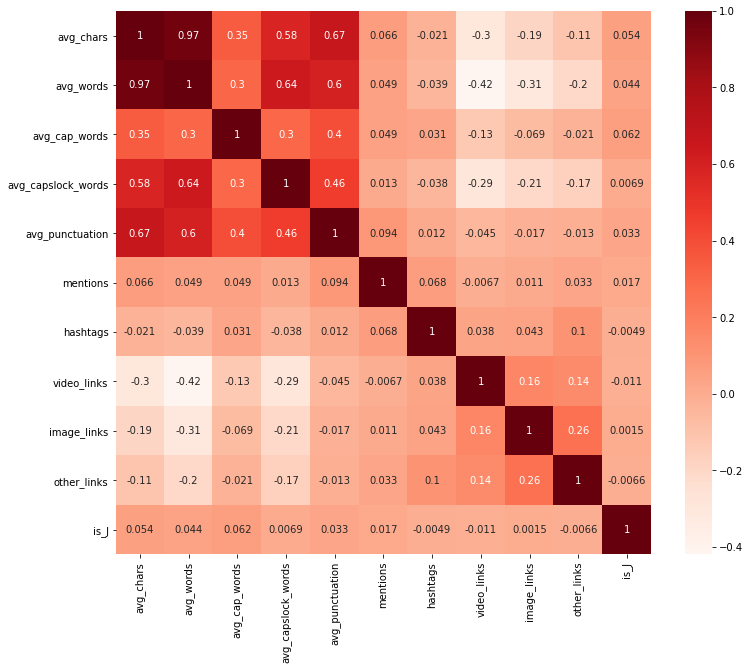

avg_chars        0.054293
avg_cap_words    0.061721
is_J             1.000000
Name: is_J, dtype: float64
Series([], Name: is_J, dtype: float64)
<class 'pandas.core.series.Series'>
features
[['avg_capslock_words', 'video_links'], ['avg_chars', 'avg_words', 'avg_punctuation'], ['avg_chars', 'avg_words', 'avg_capslock_words', 'avg_punctuation'], ['avg_chars', 'avg_cap_words'], [], [], [], [], [], [], [], [], [], [], [], []]


In [58]:
# =======================================================================
# FOR EACH PA
list_of_datasets = [dataset_E.sample(frac=1).reset_index(drop=True), dataset_S.sample(frac=1).reset_index(drop=True), dataset_T.sample(frac=1).reset_index(drop=True), dataset_J.sample(frac=1).reset_index(drop=True)]
list_of_y_vals = ['is_E', 'is_S', 'is_T', 'is_J']
list_of_four = [0, 1, 2, 3,]
feature_selection_list = []
for i in list_of_four:
  dataset = list_of_datasets[i]
  category = list_of_y_vals[i]


  y = dataset[category]

  print("including features")
  X = dataset[all_features]

  # normalize non-text features and merge dfs
  print("scaling features")
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  normalized_x = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

  # put together tfidf scores and other features that are now normalized
  X = pd.concat([normalized_x, y], axis=1)

  print("CATEGORY: ", category)


  #Using Pearson Correlation
  plt.figure(figsize=(12,10))
  cor = X.corr()
  sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
  plt.show()

  #Correlation with output variable
  cor_target = abs(cor[category])
  #Selecting highly correlated features
  print("==========================")
  relevant_features = cor_target[cor_target>0.05]
  print(relevant_features)
  relevant_features = cor_target[cor_target<-0.05]
  print(relevant_features)
  print("==========================")
  print(type(relevant_features))
  relevant_features = relevant_features[cor_target<1.0]
  relevant_features = relevant_features.index.values.tolist()
  print("features")
  pa_features.append(relevant_features)

  print(pa_features)

### For role


   type                                              posts  ...  other_links  role
0  INFJ  sacrament reconcili confessionx use struggl lo...  ...         0.00     3
1  ISTJ  wouldont watch final destin shock movi someon ...  ...         0.00     0
2  ESFJ  sure well post individu pictur link entir publ...  ...         0.00     0
3  INFP  slightli scari encourag feel thing matter ever...  ...         0.06     3
4  INTJ  yep imperi japan one best exampl cultur promin...  ...         0.00     2

[5 rows x 17 columns]
scaling features
   role  avg_chars  avg_words  ...  video_links  image_links  other_links
0     3   1.503548   1.866488  ...    -0.422779    -0.379127    -0.387653

[1 rows x 11 columns]


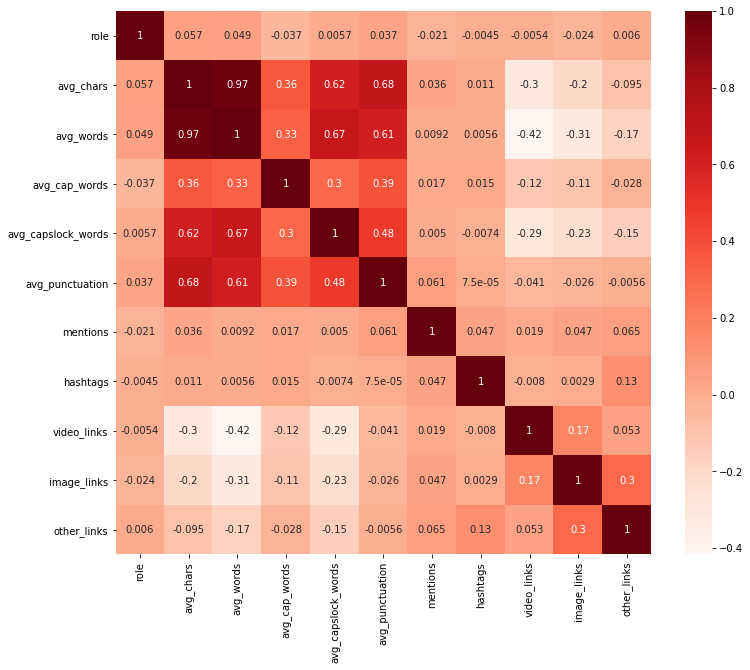

role         1.000000
avg_chars    0.057107
Name: role, dtype: float64
Series([], Name: role, dtype: float64)
features
[]


In [57]:
# =======================================================================
# FOR EACH TYPE
def get_role_for_type(ptype):
  if ptype[1]=='S':
    if ptype[3]=='J':
      return 0
    else:
      return 1
  if ptype[1]=='N':
    if ptype[2]=='T':
      return 2
    else:
      return 3


# get data / load file
import pandas as pd
file = open('/content/dataset_stem.csv', 'r')
dataset_roles = pd.read_csv(file)

dataset_roles['role'] = dataset_roles['type'].apply(lambda x: get_role_for_type(x))

balance = 1
# balance data
if(balance):
  max = 452 # entries in order: 452, 745, 3311, 4167
  # make same length
  isSen = dataset_roles.loc[dataset_roles['role'] == 0].sample(frac=1).reset_index(drop=True)[:max]
  isExp = dataset_roles.loc[dataset_roles['role'] == 1].sample(frac=1).reset_index(drop=True)[:max]
  isAna = dataset_roles.loc[dataset_roles['role'] == 2].sample(frac=1).reset_index(drop=True)[:max]
  isDip = dataset_roles.loc[dataset_roles['role'] == 3].sample(frac=1).reset_index(drop=True)[:max]

  dataset_roles = pd.concat([isSen, isExp, isAna, isDip]).sample(frac=1).reset_index(drop=True)

print(dataset_roles.head())

X = dataset_roles[all_features]
y = dataset_roles['role']

print("scaling features")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_x = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

X = pd.concat([y, normalized_x], axis=1)

print(X.head(1))

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor['role'])
#Selecting highly correlated features
print("==========================")
relevant_features = cor_target[cor_target>0.05]
print(relevant_features)
relevant_features = cor_target[cor_target<-0.05]
print(relevant_features)
print("==========================")
relevant_features = relevant_features[cor_target<1.0]
role_features = relevant_features.index.values.tolist()
print("features")

print(role_features)

# Train and Test Models

needs: dataset_stem.csv

In this section the data from dataset_stem.csv is used to train and test the following classifiers: Logistic Regression, Random Forest, K nearest neighbour and Naives Bayes (multinominal).
Logistic Regression performed significantly better than the other classifiers for all 4 categories.
The text is converted to numbers through the use of term frequency scores.

For training and testing the following parameters were defined:
* balance: if 1, truncate the majority to make data balanced; if 0, don't change data
* include_other_features: if 1, includes selected extracted features. If 0, only uses text
* scale_features: used feature scaling if 1, should only be 1 if include_other_features is 1 too
* only_best: if 1, only uses Logistic Regression, if 0, trys all models


There are 3 prediction approaches that are programmed independent of each other, so that only one can be run if wanted:
* For the 4 Personality Aspects
* For the 16 Personality Types
* For the 4 Roles

In [36]:
balance = 1
include_other_features = 1
scale_features = 0
only_best = 0

all_features = ['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions' , 'hashtags', 'video_links', 'image_links', 'other_links']
pa_features = [['avg_capslock_words', 'video_links'], ['avg_chars', 'avg_words', 'avg_punctuation'], ['avg_chars', 'avg_words', 'avg_capslock_words', 'avg_punctuation'], ['avg_chars', 'avg_cap_words']]
type_features = ['avg_words', 'avg_capslock_words', 'video_links']
role_features = ['avg_chars', 'avg_words', 'avg_punctuation']

## For the 4 Personality Aspects

### Load and Prepare Data

In [45]:
import pandas as pd

# load file
file = open('/content/dataset_stem.csv', 'r')
dataset = pd.read_csv(file)

print(dataset.columns)

if(balance):
  # make roughly same length
  isJ = dataset.loc[dataset['is_J'] == 1].sample(frac=1).reset_index(drop=True)
  isNotJ = dataset.loc[dataset['is_J'] == 0][:1197].sample(frac=1).reset_index(drop=True) #3434
  print("J/P lengths: "+str(len(isJ))+ " and "+str(len(isNotJ)))

  dataset_J = pd.concat([isJ, isNotJ]).reset_index()

  # make roughly same length
  isE = dataset.loc[dataset['is_E'] == 1].sample(frac=1).reset_index(drop=True)
  isNotE = dataset.loc[dataset['is_E'] == 0][:1197].sample(frac=1).reset_index(drop=True) #1999
  print("E/I lengths: "+str(len(isE))+ " and "+str(len(isNotE)))

  dataset_E = pd.concat([isE, isNotE])

  # make roughly same length
  isS = dataset.loc[dataset['is_S'] == 1].sample(frac=1).reset_index(drop=True)
  isNotS = dataset.loc[dataset['is_S'] == 0][:1197].sample(frac=1).reset_index(drop=True) #1197
  print("S/N lengths: "+str(len(isS))+ " and "+str(len(isNotS)))

  dataset_S = pd.concat([isS, isNotS])

  # make roughly same length
  isT = dataset.loc[dataset['is_T'] == 1].sample(frac=1).reset_index(drop=True)
  isNotT = dataset.loc[dataset['is_T'] == 0][:1197].sample(frac=1).reset_index(drop=True) #3981
  print("T/F lengths: "+str(len(isT))+ " and "+str(len(isNotT)))

  dataset_T = pd.concat([isT, isNotT])

  # choose category
  dataset = dataset_T.sample(frac=1).reset_index(drop=True)

Index(['type', 'posts', 'is_E', 'is_S', 'is_T', 'is_J', 'avg_chars',
       'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation',
       'mentions', 'hashtags', 'video_links', 'image_links', 'other_links'],
      dtype='object')
J/P lengths: 3434 and 1197
E/I lengths: 1999 and 1197
S/N lengths: 1197 and 1197
T/F lengths: 3981 and 1197


### Functions for models



In [46]:

def do_logistic_regression(X_train, y_train, X_test, y_test, pred_key):
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(C=20.0, dual=False, penalty="l2", solver="saga")
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print('======================================================')
  print("LOGISTIC REGRESSION")
  print()

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)

  print(len(dataset.loc[dataset[pred_key] == 1])/(len(dataset)))

  return y_pred

def do_k_nearest(X_train, y_train, X_test, y_test, pred_key):
  from sklearn.neighbors import KNeighborsClassifier
  regressor = KNeighborsClassifier(n_neighbors=5)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print('======================================================')
  print("K-NEAREST NEIGHBOUR")
  print()

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)

  print(len(dataset.loc[dataset[pred_key] == 1])/(len(dataset)))

  return y_pred

def do_random_forest(X_train, y_train, X_test, y_test, pred_key):
  from sklearn.ensemble import RandomForestClassifier
  regressor = RandomForestClassifier(n_estimators=20, random_state=0)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)
    
  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)
  
  print('======================================================')
  print("RANDOM FOREST")
  print()
  
  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)

  print(len(dataset.loc[dataset[pred_key] == 1])/(len(dataset)))

  return y_pred

def do_naives_bayes(X_train, y_train, X_test, y_test, pred_key):
  from sklearn.naive_bayes import MultinomialNB
  classifier = MultinomialNB()
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print('======================================================')
  print("NAIVES BAYES MULTINOMINAL")
  print()

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)
  
  print(len(dataset.loc[dataset[pred_key] == 1])/(len(dataset)))

  return y_pred

### Split, Apply TD and train & test models

In [47]:
import numpy as np

# for each type!
list_of_datasets = [dataset_E.sample(frac=1).reset_index(drop=True), dataset_S.sample(frac=1).reset_index(drop=True), dataset_T.sample(frac=1).reset_index(drop=True), dataset_J.sample(frac=1).reset_index(drop=True)]
list_of_y_vals = ['is_E', 'is_S', 'is_T', 'is_J']
list_of_four = [0, 1, 2, 3]
list_of_vocabs = []

# save y preds to determine total accuracy (gonna be 4, 1 for each PA)
y_preds_LR = []
y_preds_Kn = []
y_preds_RF = []
y_preds_NB = []
# list of y_tests (gonna be 4, 1 for each PA)
y_tests = []

for i in list_of_four:
  dataset = list_of_datasets[i]
  category = list_of_y_vals[i]

  # build TF IDF matrix out of the tweets
  from sklearn.feature_extraction.text import TfidfVectorizer
  td = TfidfVectorizer(max_features = 40000)
  # term frequency df
  X_posts = pd.DataFrame(np.array(td.fit_transform(dataset['posts'].values.astype('U')).toarray()), columns=td.get_feature_names())
  list_of_vocabs.append(td.get_feature_names())


  from sklearn.model_selection import train_test_split
  # split into X and y
  y = dataset[category]

  if include_other_features :
    print("including features")
    X_features = dataset[pa_features[i]]
    if scale_features :
      print("scaling features")
      from sklearn.preprocessing import StandardScaler
      scaler = StandardScaler()
      X_features = pd.DataFrame(scaler.fit_transform(X_features), columns = X_features.columns)

    X = pd.concat([X_posts, X_features], axis=1)
  else:
    print("not including features")
    X = X_posts

  # split into training & testing subsets
  X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, stratify=None, test_size=0.3, random_state=0)


  # if include_other_features:
  #   print("including features")
  #   X = dataset[pa_features[i]]
  #   mat = td.fit_transform(dataset['posts'].values.astype('U'))               # build and add TF IDF matrix
  #   tdidf_df = pd.DataFrame.sparse.from_spmatrix(mat)
  #   # split tdidf features only
  #   X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(tdidf_df, y, shuffle=False, stratify=None, test_size=0.3, random_state=0)
  # # normalize non-text features and merge dfs
  # if (scale_features and include_other_features):
  #   print("scaling features")
  #   from sklearn.preprocessing import StandardScaler
  #   scaler = StandardScaler()
  #   normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
  #   normalized_x_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

  #   # reset index for X_test_b so that concatination works
  #   X_test_b = X_test_b.reset_index(drop=True)

  #   # put together tfidf scores and other features that are now normalized
  #   X_train = pd.concat([normalized_x_train, X_train_b], axis=1)
  #   X_test = pd.concat([normalized_x_test, X_test_b], axis=1)

  print("CATEGORY: ", category)
  
  y_tests.append(y_test.to_numpy())
  #y_preds_LR.append ( do_logistic_regression(X_train, y_train, X_test, y_test, category) )
  if not only_best:
    y_preds_Kn.append ( do_k_nearest(X_train, y_train, X_test, y_test, category) )
  #  y_preds_RF.append ( do_random_forest(X_train, y_train, X_test, y_test, category) )
  #  y_preds_NB.append ( do_naives_bayes(X_train, y_train, X_test, y_test, category) )




including features
CATEGORY:  is_E
K-NEAREST NEIGHBOUR


 Accuracy:  0.607924921793535

Classification Report

               precision    recall  f1-score   support

           0       0.44      0.30      0.36       346
           1       0.66      0.78      0.72       613

    accuracy                           0.61       959
   macro avg       0.55      0.54      0.54       959
weighted avg       0.58      0.61      0.59       959

0.6254693366708386
including features
CATEGORY:  is_S
K-NEAREST NEIGHBOUR


 Accuracy:  0.5271210013908206

Classification Report

               precision    recall  f1-score   support

           0       0.53      0.52      0.53       363
           1       0.52      0.53      0.53       356

    accuracy                           0.53       719
   macro avg       0.53      0.53      0.53       719
weighted avg       0.53      0.53      0.53       719

0.5
including features
CATEGORY:  is_T
K-NEAREST NEIGHBOUR


 Accuracy:  0.7393822393822393

Classific

In [48]:
# determine accuracy for type! -> crashed if done all at once. was run seperately for each classifier!

fulltype_pred = []
fulltype_test = []

y_preds = y_preds_Kn

for row in range(len(y_preds[1])):
  # make y pred type
  fulltype = ""
  fulltype = ""+str(y_preds[0][row])+str(y_preds[1][row])+str(y_preds[2][row])+str(y_preds[3][row])
  fulltype_pred.append(fulltype)

  # make y test type
  fulltype = ""
  fulltype = ""+str(y_tests[0][row])+str(y_tests[1][row])+str(y_tests[2][row])+str(y_tests[3][row])
  fulltype_test.append(fulltype)

from sklearn.metrics import accuracy_score, classification_report
classification_rep = classification_report(fulltype_test, fulltype_pred)
print('======================================================')
print('\nClassification Report for FULL TYPE')
print('======================================================')
print('\n', classification_rep)


Classification Report for FULL TYPE

               precision    recall  f1-score   support

        0000       0.00      0.00      0.00        11
        0001       0.00      0.00      0.00        22
        0010       0.00      0.00      0.00        23
        0011       0.15      0.15      0.15        74
        0100       0.00      0.00      0.00        13
        0101       0.29      0.09      0.14        22
        0110       0.00      0.00      0.00        24
        0111       0.19      0.17      0.18        77
        1000       0.00      0.00      0.00        12
        1001       0.04      0.02      0.03        49
        1010       0.00      0.00      0.00        41
        1011       0.18      0.28      0.22       131
        1100       0.33      0.07      0.11        15
        1101       0.24      0.10      0.14        41
        1110       0.04      0.02      0.03        48
        1111       0.16      0.32      0.22       116

    accuracy                           0.

## For the 16 Personality Types



### Load and Prepare Data

In [31]:
# get data / load file
import pandas as pd
file = open('/content/dataset_stem.csv', 'r')
dataset_types = pd.read_csv(file)

# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset_types['type_encoded']= label_encoder.fit_transform(dataset_types['type']) 

# balance data
if(balance):
  # make roughly same length
  max = 39
  dataset_types_list = []
  for i in range(16):
    dataset_types_list.append( dataset_types.loc[dataset_types['type_encoded'] == i].sample(frac=1).reset_index(drop=True)[:max] )

  dataset_types = pd.concat(dataset_types_list).sample(frac=1).reset_index(drop=True)


### Functions for Models

In [32]:
from sklearn.linear_model import LogisticRegression

def print_accs(y_test, y_pred):
  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_rep = classification_report(y_test, y_pred)

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_rep)

  # accuracy for each letter
  print('======================================================')
  y_test = y_test.to_numpy()

  y_test_E_I = []
  y_pred_E_I = []
  y_test_S_N = []
  y_pred_S_N = []
  y_test_T_F = []
  y_pred_T_F = []
  y_test_J_P = []
  y_pred_J_P = []

  y_test_all = [y_test_E_I, y_test_S_N, y_test_T_F, y_test_J_P]
  y_pred_all = [y_pred_E_I, y_pred_S_N, y_pred_T_F, y_pred_J_P]
  for i in range(len(y_pred)):
    correct_type = label_encoder.inverse_transform([y_test[i]])[0]
    predicted_type = label_encoder.inverse_transform([y_pred[i]])[0]
    for x in range(4):
      if correct_type[x] in ['E', 'S', 'T', 'J'] :
        y_test_all[x].append(1)
      if correct_type[x] in ['I', 'N', 'F', 'P'] :
        y_test_all[x].append(0)

      if predicted_type[x] in ['E', 'S', 'T', 'J'] :
        y_pred_all[x].append(1)
      if predicted_type[x] in ['I', 'N', 'F', 'P'] :
        y_pred_all[x].append(0)

  for num in range(4):
    classification_rep = classification_report(y_test_all[num], y_pred_all[num])
    print('======================================================')
    print('\nClassification Report for PA',num)
    print('======================================================')
    print('\n', classification_rep)

def do_logistic_regression(X_train, y_train, X_test, y_test):
  classifier = LogisticRegression(C=20.0, dual=False, penalty="l2", solver="saga")
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  
  print('======================================================')
  print("LOGISTIC REGRESSION")
  print('======================================================')
  print_accs(y_test, y_pred)

def do_k_nearest(X_train, y_train, X_test, y_test):
  from sklearn.neighbors import KNeighborsClassifier
  regressor = KNeighborsClassifier(n_neighbors=5)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print('======================================================')
  print("K-NEAREST NEIGHBOUR")
  print('======================================================')
  print_accs(y_test, y_pred)


def do_random_forest(X_train, y_train, X_test, y_test):
  from sklearn.ensemble import RandomForestClassifier
  regressor = RandomForestClassifier(n_estimators=20, random_state=0)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)
    
  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)
  
  print('======================================================')
  print("RANDOM FOREST")
  print('======================================================')
  print_accs(y_test, y_pred)

def do_naives_bayes(X_train, y_train, X_test, y_test):
  from sklearn.naive_bayes import MultinomialNB
  classifier = MultinomialNB()
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print('======================================================')
  print("NAIVES BAYES MULTINOMINAL")
  print('======================================================')
  print_accs(y_test, y_pred)


### Split, Apply TD and train & test models

In [33]:
import scipy.sparse
import numpy as np

def get_prediction_for_type():
  print("Training model: Types...")

  dataset = dataset_types
  # build TF IDF matrix out of the tweets
  from sklearn.feature_extraction.text import TfidfVectorizer
  td = TfidfVectorizer(max_features = 40000)
  # term frequency df
  X_posts = pd.DataFrame(np.array(td.fit_transform(dataset['posts'].values.astype('U')).toarray()), columns=td.get_feature_names())
  list_of_vocabs.append(td.get_feature_names())

  from sklearn.model_selection import train_test_split
  # split into X and y
  y = dataset['type_encoded']

  if include_other_features :
    print("including features")
    X_features = dataset[type_features]
    if scale_features :
      print("scaling features")
      from sklearn.preprocessing import StandardScaler
      scaler = StandardScaler()
      X_features = pd.DataFrame(scaler.fit_transform(X_features), columns = X_features.columns)

    X = pd.concat([X_posts, X_features], axis=1)
  else:
    print("not including features")
    X = X_posts
                                                            
  # split into training & testing subsets
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=False, test_size=0.3, random_state=0)

  do_logistic_regression(X_train, y_train, X_test, y_test)
  if not only_best:
    do_k_nearest(X_train, y_train, X_test, y_test)
    do_random_forest(X_train, y_train, X_test, y_test)
    do_naives_bayes(X_train, y_train, X_test, y_test)

def get_prediction_for_type2():
  print("Training model: Types...")

  # for each category, perform test, train, prediction
  list_of_datasets = [dataset_E.sample(frac=1).reset_index(drop=True), dataset_S.sample(frac=1).reset_index(drop=True), dataset_T.sample(frac=1).reset_index(drop=True), dataset_J.sample(frac=1).reset_index(drop=True)]
  list_of_y_vals = ['is_E', 'is_S', 'is_T', 'is_J']
  list_of_four = [0, 1, 2, 3]
  
  for i in list_of_four:
    print("Training model ", (i+1), "/4...")
    dataset = list_of_datasets[i]
    category = list_of_y_vals[i]

    # build TF IDF matrix out of the tweets
    from sklearn.feature_extraction.text import TfidfVectorizer
    td = TfidfVectorizer(max_features = 40000)
    # term frequency df
    X_posts = pd.DataFrame(np.array(td.fit_transform(dataset['posts'].values.astype('U')).toarray()), columns=td.get_feature_names())
    list_of_vocabs.append(td.get_feature_names())

    from sklearn.model_selection import train_test_split
    # split into X and y
    y = dataset['type_encoded']

    if include_other_features :
      print("including features")
      X_features = dataset[pa_features[i]]
      if scale_features :
        print("scaling features")
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_features = pd.DataFrame(scaler.fit_transform(X_features), columns = X_features.columns)

      X = pd.concat([X_posts, X_features], axis=1)
    else:
      print("not including features")
      X = X_posts
                                                            
    # split into training & testing subsets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=False, test_size=0.3, random_state=0)

    do_logistic_regression(X_train, y_train, X_test, y_test, i)
    if not only_best:
      do_k_nearest(X_train, y_train, X_test, y_test, i)
      do_random_forest(X_train, y_train, X_test, y_test, i)
      do_naives_bayes(X_train, y_train, X_test, y_test, i)

In [34]:
get_prediction_for_type()

Training model: Types...
not including features
LOGISTIC REGRESSION

 Accuracy:  0.2553191489361702

 Accuracy:  0.2553191489361702

Classification Report

               precision    recall  f1-score   support

           0       0.15      0.43      0.22         7
           1       0.38      0.23      0.29        13
           2       0.14      0.50      0.22         8
           3       0.29      0.15      0.20        13
           4       0.42      0.33      0.37        15
           5       0.06      0.11      0.08         9
           6       0.67      0.31      0.42        13
           7       0.42      0.42      0.42        12
           8       0.33      0.07      0.11        15
           9       0.33      0.06      0.11        16
          10       0.09      0.10      0.10        10
          11       0.50      0.23      0.32        13
          12       0.30      0.27      0.29        11
          13       0.62      0.36      0.45        14
          14       0.19      0.6

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-NEAREST NEIGHBOUR

 Accuracy:  0.11170212765957446

 Accuracy:  0.11170212765957446

Classification Report

               precision    recall  f1-score   support

           0       0.05      0.71      0.10         7
           1       0.17      0.38      0.23        13
           2       0.33      0.38      0.35         8
           3       0.00      0.00      0.00        13
           4       0.14      0.20      0.17        15
           5       0.00      0.00      0.00         9
           6       0.33      0.15      0.21        13
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        13
          12       0.11      0.09      0.10        11
          13       0.00      0.00      0.00        14
          14       0.33      0.12      0.18         8
          15       0.20 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## For the 4 Roles

the roles are:
*   0: ESFJ, ESTJ, ISTJ, ISFJ -> Sentinels (S+J)
*   1: ISFP, ISTP, ESFP, ESTP -> Exploerers (S+P)
*   2: INTP, INTJ, ENTP, ENTJ -> Analysts (N+T)
*   3: ENFP, ENFJ, INFP, INFJ -> Diplomats (N+F)

### Load and Prepare Data

In [16]:
def get_role_for_type(ptype):
  if ptype[1]=='S':
    if ptype[3]=='J':
      return 0
    else:
      return 1
  if ptype[1]=='N':
    if ptype[2]=='T':
      return 2
    else:
      return 3


# get data / load file
import pandas as pd
file = open('/content/dataset_stem.csv', 'r')
dataset_roles = pd.read_csv(file)

dataset_roles['role'] = dataset_roles['type'].apply(lambda x: get_role_for_type(x))

# balance data
if(balance):
  max = 452 # entries in order: 452, 745, 3311, 4167
  # make same length
  isSen = dataset_roles.loc[dataset_roles['role'] == 0].sample(frac=1).reset_index(drop=True)[:max]
  isExp = dataset_roles.loc[dataset_roles['role'] == 1].sample(frac=1).reset_index(drop=True)[:max]
  isAna = dataset_roles.loc[dataset_roles['role'] == 2].sample(frac=1).reset_index(drop=True)[:max]
  isDip = dataset_roles.loc[dataset_roles['role'] == 3].sample(frac=1).reset_index(drop=True)[:max]

  dataset_roles = pd.concat([isSen, isExp, isAna, isDip]).sample(frac=1).reset_index(drop=True)

print(dataset_roles.head())

   type                                              posts  ...  other_links  role
0  INTJ  typic avoid peopl fit one categori bore annoy ...  ...         0.00     2
1  ISFP  call sf live drive life look hope accomplish l...  ...         0.04     1
2  INTP  interest may notion mbti may set judgement mus...  ...         0.00     2
3  ISFP  thank much mention look back write feel bia ju...  ...         0.00     1
4  ISTJ  ame attempt take interest thing outsid comfort...  ...         0.00     0

[5 rows x 17 columns]


### Functions for models



In [17]:
def do_logistic_regression(X_train, y_train, X_test, y_test):
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(C=20.0, dual=False, penalty="l2", solver="saga")
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print("LOGISTIC REGRESSION")
  print()

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)


def do_k_nearest(X_train, y_train, X_test, y_test):
  from sklearn.neighbors import KNeighborsClassifier
  regressor = KNeighborsClassifier(n_neighbors=5)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print("K-NEAREST NEIGHBOUR")
  print()

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)


def do_random_forest(X_train, y_train, X_test, y_test):
  from sklearn.ensemble import RandomForestClassifier
  regressor = RandomForestClassifier(n_estimators=20, random_state=0)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)
    
  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)
  
  print("RANDOM FOREST")
  print()
  
  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)


def do_naives_bayes(X_train, y_train, X_test, y_test):
  from sklearn.naive_bayes import MultinomialNB
  classifier = MultinomialNB()
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print("NAIVES BAYES MULTINOMINAL")
  print()

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)
  

### Split, Apply TD and train & test models

In [18]:
import scipy.sparse

def get_prediction_for_role():
  print("Training model: Roles...")

  dataset = dataset_roles
  # build TF IDF matrix out of the tweets
  from sklearn.feature_extraction.text import TfidfVectorizer
  td = TfidfVectorizer(max_features = 40000)
  # term frequency df
  X_posts = pd.DataFrame(np.array(td.fit_transform(dataset['posts'].values.astype('U')).toarray()), columns=td.get_feature_names())

  from sklearn.model_selection import train_test_split
  # split into X and y
  y = dataset['role']

  if include_other_features :
    print("including features")
    X_features = dataset[role_features]
    if scale_features :
      print("scaling features")
      from sklearn.preprocessing import StandardScaler
      scaler = StandardScaler()
      X_features = pd.DataFrame(scaler.fit_transform(X_features), columns = X_features.columns)

    X = pd.concat([X_posts, X_features], axis=1)
  else:
    print("not including features")
    X = X_posts
                                                      
  # split into training & testing subsets
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=False, test_size=0.3, random_state=0)


  # # normalize non-text features and merge dfs if scale_features and include_other_features = true
  # if (scale_features and include_other_features):
  #   print("scaling features")
  #   from sklearn.preprocessing import StandardScaler
  #   scaler = StandardScaler()
  #   normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
  #   normalized_x_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

  #   # reset index for X_test_b so that concatination works
  #   X_test_b = X_test_b.reset_index(drop=True)

  #   # put together tfidf scores and other features that are now normalized
  #   X_train = pd.concat([normalized_x_train, X_train_b], axis=1)
  #   X_test = pd.concat([normalized_x_test, X_test_b], axis=1)


  do_logistic_regression(X_train, y_train, X_test, y_test)
  if not only_best:
    do_k_nearest(X_train, y_train, X_test, y_test)
    do_random_forest(X_train, y_train, X_test, y_test)
    do_naives_bayes(X_train, y_train, X_test, y_test)



In [19]:
get_prediction_for_role()

Training model: Roles...
including features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LOGISTIC REGRESSION


 Accuracy:  0.31123388581952116

Classification Report

               precision    recall  f1-score   support

           0       0.50      0.02      0.03       133
           1       0.31      0.26      0.28       134
           2       0.40      0.38      0.39       142
           3       0.27      0.58      0.37       134

    accuracy                           0.31       543
   macro avg       0.37      0.31      0.27       543
weighted avg       0.37      0.31      0.27       543

K-NEAREST NEIGHBOUR


 Accuracy:  0.26151012891344383

Classification Report

               precision    recall  f1-score   support

           0       0.25      0.35      0.29       133
           1       0.28      0.28      0.28       134
           2       0.29      0.27      0.28       142
           3       0.23      0.15      0.18       134

    accuracy                           0.26       543
   macro avg       0.26      0.26      0.26       543
weighted avg       0.26    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Make Predictions

needs: dataset_stem.csv

This section includes everything needed to make predictions using Logistic Regression. Run the whole section once; previous sections do not need to be run before. Afterwards, only the username needs to be changed in the very last section and only that section needs to be run to get a prediction.

## Twitter API Section
This Section contains the code that uses the Twitter API to get a certain user's last 200 Tweets. This excludes retweets and replies.



In [ ]:
import requests
import os
import json

class TwitterAPI():

  def __init__(self):
    #Twitter API credentials
    self.api_key = "ZBXJ9S31jdSFQi2HROrpiaL4J"
    self.api_secret = "oKnOiBBjhwCybbLiyKMo11UA2SVdWpj3RtDyMC6Sp8B9DNutXe"
    self.bearer_token = "AAAAAAAAAAAAAAAAAAAAAJdALAEAAAAA85rws0I%2FhUSPgHqs%2BT3CAMCVqkc%3DnPPe0NAFpRINsI3xjPJY2Em3BClcCqpheWCOcOPRgbNObUOyBm"

    # parameters
    self.include_rts = "0"
    self.exclude_replies = "1" 
    self.count = "200" # number of tweets returned, 200 is max

  def connect_to_endpoint(self, url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
      raise Exception(response.status_code, response.text)
      print(json.dumps(json_response, indent=4, sort_keys=True))
    return response.json()

  # returns json response; tweet["full_text"] to get the tweet
  def get_all_tweets_response(self, username): 
    url = "https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name="+username+"&count="+self.count+"&include_rts="+self.include_rts+"&exclude_replies="+self.exclude_replies+"&tweet_mode=extended"
    headers = {"Authorization": "Bearer {}".format(self.bearer_token)}
    json_response = self.connect_to_endpoint(url, headers)
    #print(json.dumps(json_response, indent=4, sort_keys=True))
    return json_response

  # returns string list of tweets from user
  def get_all_tweets(self, username): 
    response = self.get_all_tweets_response(username)
    #testResponse(response)
    result = []
    for tweet in response:
      result.append(tweet["full_text"])
    return result

  def testResponse(self, response):
    for tweet in response:
      print(tweet["full_text"])


In [ ]:
import re
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

delimiters = '(\s+|\s*,\s*)'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

regex_punctuation = r"(,|\.+|!|\?)"
regex_links = r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"

# returns url count for videos, images and other links
def count_urls(df):
  image_regex = r"(.*\.(jpg|png|gif)$|https:\/\/t\.co\/.*)"
  videos_regex = r".*(youtube|youtu.be|vimeo|dailymotion|jetpack|twitch).*"
  urls = re.findall(regex_links,df)
  cnt_images = 0
  cnt_videos = 0
  cnt_other = 0
  for url in urls:
    if re.match(image_regex, str(url)):
      cnt_images += 1
    elif re.match(videos_regex, str(url)):
      cnt_videos += 1
    else:
      cnt_other += 1
  return cnt_videos, cnt_images, cnt_other

# extracts features from users tweets (for twitter API tweets)
def extract_from_user(x_tweets):
    video_links = 0
    image_links = 0
    other_links = 0
    mentions = 0
    hashtags = 0
    avg_chars = 0
    avg_words = 0
    avg_cap_words = 0
    avg_punctuation = 0
    avg_capslock_words = 0

    # get data from individual tweets of one person/row
    for tweet in x_tweets:
      # count average capslocked words per tweet
      avg_capslock_words = (avg_capslock_words + len( re.findall(r'\b[A-Z]+\b', tweet)))
      # count words with first letter capitalized
      avg_cap_words = (avg_cap_words + len( re.findall(r'\b([A-Z][a-z]+)\b', tweet)))
      # count avgerage characters per tweet
      avg_chars = (avg_chars + len(tweet))
      # count average words per tweet
      avg_words = (avg_words + len(re.findall(r'\s+', tweet))+1)
      # count mentions
      mentions += tweet.count('@')
      # count hastags
      hashtags += tweet.count('#')
      # count punctiuation
      avg_punctuation = (avg_punctuation + len(re.findall(regex_punctuation, tweet))+1)
      # count video, image and other links
      tmp1, tmp2, tmp3 = count_urls(tweet)
      video_links += tmp1
      image_links += tmp2
      other_links += tmp3

      # print(tweet)
      # print("cap words: "+ str(avg_cap_words))
      # print("capslock words: "+ str(avg_capslock_words))
      # print("chars: "+ str(avg_chars))
      # print("words: "+ str(avg_words))
      # print("@s: "+ str(mentions))
      # print("#s: "+ str(hashtags))
      # print("punctiuation: "+ str(avg_punctuation))
      # print("links: "+ str(video_links + image_links + other_links))
    
    #make averages
    avg_capslock_words = avg_capslock_words / len(x_tweets)
    avg_cap_words = avg_cap_words / len(x_tweets)
    avg_chars = avg_chars / len(x_tweets)
    avg_words = avg_words / len(x_tweets)
    avg_punctuation = avg_punctuation / len(x_tweets)
    mentions = mentions / len(x_tweets)
    hashtags = hashtags / len(x_tweets)
    video_links = video_links / len(x_tweets)
    image_links = image_links / len(x_tweets)
    other_links = other_links / len(x_tweets)

    return video_links, image_links, other_links, mentions, hashtags, avg_chars, avg_words, avg_cap_words, avg_capslock_words, avg_punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Train Model (Logistic Regression)

In [ ]:
balance = 1
include_other_features = 0
scale_features = 0

# needs to be rerun when features are changed!!!

### load data and balance datasets if needed

In [ ]:
# get data / load file
import pandas as pd
file = open('/content/dataset_stem.csv', 'r')
dataset = pd.read_csv(file)

# balance data
if(balance):
  # make roughly same length
  isJ = dataset.loc[dataset['is_J'] == 1].sample(frac=1).reset_index(drop=True)
  isNotJ = dataset.loc[dataset['is_J'] == 0][:3434].sample(frac=1).reset_index(drop=True)

  dataset_J = pd.concat([isJ, isNotJ]).reset_index()

  # make roughly same length
  isE = dataset.loc[dataset['is_E'] == 1].sample(frac=1).reset_index(drop=True)
  isNotE = dataset.loc[dataset['is_E'] == 0][:1999].sample(frac=1).reset_index(drop=True)

  dataset_E = pd.concat([isE, isNotE])

  # make roughly same length
  isS = dataset.loc[dataset['is_S'] == 1].sample(frac=1).reset_index(drop=True)
  isNotS = dataset.loc[dataset['is_S'] == 0][:1197].sample(frac=1).reset_index(drop=True)

  dataset_S = pd.concat([isS, isNotS])

  # make roughly same length
  isT = dataset.loc[dataset['is_T'] == 1].sample(frac=1).reset_index(drop=True)
  isNotT = dataset.loc[dataset['is_T'] == 0][:3981].sample(frac=1).reset_index(drop=True)

  dataset_T = pd.concat([isT, isNotT])

  list_of_datasets = [dataset_E.sample(frac=1).reset_index(drop=True), dataset_S.sample(frac=1).reset_index(drop=True), dataset_T.sample(frac=1).reset_index(drop=True), dataset_J.sample(frac=1).reset_index(drop=True)]
else:
  list_of_datasets = [dataset, dataset, dataset, dataset] # if unbalanced will use this

### train and test models for each category

In [ ]:
import scipy.sparse
tdlist = []
def initialize_model():
  types = []
  # for each category, perform test, train, prediction
  list_of_y_vals = ['is_E', 'is_S', 'is_T', 'is_J']
  list_of_four = [0, 1, 2, 3]


  for i in list_of_four:
    print("Training model ", (i+1), "/4...")

    # initialize tfidf vectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    td = TfidfVectorizer(max_features = 40000)
    tdlist.append(td)

    dataset = list_of_datasets[i]
    category = list_of_y_vals[i]

    # split into X and y
    if(include_other_features):
      X = dataset[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions', 'hashtags']]
      mat = td.fit_transform(dataset['posts'].values.astype('U'))               # build and add TF IDF matrix
      testdf = pd.DataFrame.sparse.from_spmatrix(mat)
      X = pd.concat([X, testdf], axis=1)
    else:
      X = dataset['posts']
      X = tdlist[i].fit_transform(X.values.astype('U')).toarray()               # build and add TF IDF matrix

    y = dataset[category]
                                                               

    # split into training & testing subsets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=False, test_size=0.3, random_state=0)

    # # Feature Scaling
    if(scale_features):
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)
  
    types.append(do_logistic_regression3(X_train, y_train, X_test, y_test))
    #types.append( do_logistic_regression2(X, y, category, user_row_new))

  return types

def get_prediction(user_row):
  types = []
  # for each category, perform test, train, prediction
  list_of_datasets = [dataset_E.sample(frac=1).reset_index(drop=True), dataset_S.sample(frac=1).reset_index(drop=True), dataset_T.sample(frac=1).reset_index(drop=True), dataset_J.sample(frac=1).reset_index(drop=True)]
  list_of_y_vals = ['is_E', 'is_S', 'is_T', 'is_J']
  list_of_four = [0, 1, 2, 3]
  for i in list_of_four:
    print("Training model ", (i+1), "/4...")
    dataset = list_of_datasets[i]
    category = list_of_y_vals[i]

    # split into X and y
    X = dataset['posts'] #dataset[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions', 'hashtags']]
    X = X.append(user_row['posts'])
    y = dataset[category]
    y = y.append(user_row[category])

    # build TF IDF matrix out of the tweets
    from sklearn.feature_extraction.text import TfidfVectorizer
    td = TfidfVectorizer(max_features = 40000)
    X = td.fit_transform(X.values.astype('U')).toarray()

    # user_row_new = pd.DataFrame(data=X).tail()#.to_numpy()                    # get last row after TFing
    # tmp = pd.DataFrame(data=X)                                                # make x and y same length again
    # tmp = tmp[:-1]
    # X = tmp.to_numpy()
    #X = X[:-1]                                                                 
    # convert to dataframe, add other params, convert back to array
    if(include_other_features):
      df = pd.DataFrame(data=X)
      df[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words']] = dataset[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words']]
      X = df.to_numpy()

    # split into training & testing subsets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=False, test_size=0.3, random_state=0)

    # # Feature Scaling
    if(scale_features):
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

    types.append(do_logistic_regression3(X_train, y_train, X_test, y_test))
    #types.append( do_logistic_regression2(X, y, category, user_row_new))

  return types

In [ ]:
from sklearn.linear_model import LogisticRegression

# returns trained classifier
def do_logistic_regression3(X_train, y_train, X_test, y_test):
  classifier = LogisticRegression(C=20.0, dual=False, penalty="l2", solver="saga")
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)
  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('======================================================')

  return classifier

#returns last row of prediction
def do_logistic_regression2(X_train, y_train, X_test, y_test, pred_key):
  classifier = LogisticRegression(C=20.0, dual=False, penalty="l2", solver="saga")
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  return y_pred[-1]

# returns all predicitons for test
def do_logistic_regression(X_train, y_train, X_test, y_test, pred_key):
  classifier = LogisticRegression(C=20.0, dual=False, penalty="l2", solver="saga")
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  print(y_pred)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print("LOGISTIC REGRESSION")
  print()

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)

  print("PREDICTION FOR ", pred_key, ": ", y_pred[-1])
  print("type of y_pred: ", type(y_pred))

  return y_pred[-1]

In [ ]:
models = initialize_model()

Training model  1 /4...

 Accuracy:  0.7233333333333334
Training model  2 /4...

 Accuracy:  0.7315716272600834
Training model  3 /4...

 Accuracy:  0.8145667643365425
Training model  4 /4...

 Accuracy:  0.7185832120329937


## Predict

#### sub-functions

In [ ]:
import nltk
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
import pandas as pd
import re
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import wordnet

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lancaster=LancasterStemmer()
porter = PorterStemmer()

# Does position tagging for one word
def do_pos_tagging(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    #print("Tag: "+tag)
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    # tag_dict = {'ADJ':['JJ','JJR','JJS'], 'ADP':['EX','TO'], 'ADV':['RB','RBR','RBS','WRB'], 'CONJ':['CC','IN'],'DET':['DT','PDT','WDT'],
    #           'NOUN':['NN','NNS','NNP','NNPS'], 'NUM':['CD'],'PRT':['RP'],'PRON':['PRP','PRP$','WP','WP$'],
    #           'VERB':['MD','VB','VBD','VBG','VBN','VBP','VBZ'],'.':['#','$',"''",'(',')',',','.',':'],'X':['FW','LS','UH']}

    return tag_dict.get(tag, wordnet.NOUN)

# Defining a Function to clean up the reviews 
def text_preprocess(ds: pd.Series) -> pd.Series:
    """
    Apply NLP Preprocessing Techniques to the reviews.
    """
    for m in range(len(ds)):
        main_words = re.sub('[^a-zA-Z]', ' ', ds[m])                                          # Retain only alphabets
        main_words = (main_words).split()

        lem = WordNetLemmatizer()
        main_words = [lem.lemmatize(w, do_pos_tagging(w)) for w in main_words if len(w) > 1]  # Group different forms of the same word

        main_words = [w for w in main_words if not w in set(stopwords.words('english'))]      # Remove stopwards AFTER pos tagging!
   
        main_words = [porter.stem(w) for w in main_words if len(w) > 1]                       # get stems
       
        main_words = ' '.join(main_words)
        ds[m] = main_words

    return ds

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## feature extraction
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

delimiters = '(\s+|\s*,\s*)'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

regex_punctuation = r"(,|\.+|!|\?)"
regex_links = r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"


# extracts features from posts of dataframe and adds them to csv
def extract_features_user(df):
  print("Counting meta data...", end="")
  cnt = 0 # counts rows

  # make arrays to add later
  video_links = []
  image_links = []
  other_links = []
  mentions = []
  hashtags = []
  avg_chars = []
  avg_words = []
  avg_cap_words = []
  avg_punctuation = []
  avg_capslock_words = []

  for row in df.itertuples():
    print(row)
    x_tweets = (row.posts).split('|||')
    video_links.append(0)
    image_links.append(0)
    other_links.append(0)
    mentions.append(0)
    hashtags.append(0)
    avg_chars.append(0)
    avg_words.append(0)
    avg_cap_words.append(0)
    avg_punctuation.append(0)
    avg_capslock_words.append(0)

    video_links[cnt], image_links[cnt], other_links[cnt], mentions[cnt], hashtags[cnt], avg_chars[cnt], avg_words[cnt], avg_cap_words[cnt], avg_capslock_words[cnt], avg_punctuation[cnt] = extract_from_user(x_tweets)

    cnt = cnt+1

  # add to csv
  df['avg_chars'] = avg_chars
  df['avg_words'] = avg_words
  df['avg_cap_words'] = avg_cap_words
  df['avg_capslock_words'] = avg_capslock_words
  df['avg_punctuation'] = avg_punctuation
  df['mentions'] = mentions
  df['hashtags'] = hashtags
  df['video_links'] = video_links
  df['image_links'] = image_links
  df['other_links'] = other_links

  df.columns = ['posts', 'is_E',  'is_S',  'is_T', 'is_J', 'avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions' , 'hashtags', 'video_links', 'image_links', 'other_links']
  
  print("finished")

# returns url count for videos, images and other links
def count_urls(df):
  image_regex = r"(.*\.(jpg|png|gif)$|https:\/\/t\.co\/.*)"
  videos_regex = r".*(youtube|youtu.be|vimeo|dailymotion|jetpack|twitch).*"
  urls = re.findall(regex_links,df)
  cnt_images = 0
  cnt_videos = 0
  cnt_other = 0
  for url in urls:
    if re.match(image_regex, str(url)):
      cnt_images += 1
    elif re.match(videos_regex, str(url)):
      cnt_videos += 1
    else:
      cnt_other += 1
  return cnt_videos, cnt_images, cnt_other

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
### Preprocess

import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

delimiters = '(\s+|\s*,\s*)'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

regex_punctuation = r"(,|\.+|!|\?)"
regex_links = r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"

types = ["istj", "istp", "isfj", "isfp", "infj", "infp", "intj", "intp", "estp", "estj", "esfp", "esfj", "enfp", "enfj", "entp", "entj"]

def handle_apostrophy(df):
  print("Converting words with apostrophies..."),
  
  # find words with missing apostrophies and replace directly
  df["posts"] = df['posts'].str.replace(r'\bim\b', 'i am')
  df["posts"] = df['posts'].str.replace(r'\bive\b', 'i have')
  df["posts"] = df['posts'].str.replace(r'\bweve\b', 'we have') 
  df["posts"] = df['posts'].str.replace(r'\btheyve\b', 'they have')      
  df["posts"] = df['posts'].str.replace(r'\bim\b', 'i am')                      
  df["posts"] = df['posts'].str.replace(r'\byoure\b', 'you are')  
  df["posts"] = df['posts'].str.replace(r'\bwere\b', 'we are')  
  df["posts"] = df['posts'].str.replace(r'\btheyre\b', 'they are') 
  df["posts"] = df['posts'].str.replace(r'\byoull\b', 'you will')  
  df["posts"] = df['posts'].str.replace(r'\bitll\b', 'it will')  
  df["posts"] = df['posts'].str.replace(r'\btheyll\b', 'they will')    
  df["posts"] = df['posts'].str.replace(r'\bhes got\b', 'he has got')  
  df["posts"] = df['posts'].str.replace(r'\bshes got\b', 'she has got') 
  df["posts"] = df['posts'].str.replace(r'\bits got\b', 'it has got')   
  df["posts"] = df['posts'].str.replace(r'\bhes been\b', 'he has been')  
  df["posts"] = df['posts'].str.replace(r'\bshes been\b', 'she has been') 
  df["posts"] = df['posts'].str.replace(r'\bits been\b', 'it has been')
  df["posts"] = df['posts'].str.replace(r'\bhes\b', 'he is')  
  df["posts"] = df['posts'].str.replace(r'\bshes\b', 'she is')
  df["posts"] = df['posts'].str.replace(r'\byoud\b', 'you would')
  df["posts"] = df['posts'].str.replace(r'\bhed\b', 'he would')
  df["posts"] = df['posts'].str.replace(r'\bitd\b', 'it would')
  df["posts"] = df['posts'].str.replace(r'\btheyd\b', 'they would')
  # well, shell, hell, its, shed, id, wed -> are words too, so no replacing 

  # replace apostrophies and word after with suited word
  regex_have = r"\'ve"
  regex_am = r"\'m"
  regex_has = r"(?<=(he|it))'s got"
  regex_is = r"\'s"                                                             # has to be after regex_has
  regex_are = r"\'re"
  regex_will = r"\'ll"
  regex_would = r"\'d"

  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_have, " have", x))     # replace 've with have
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_am, " am", x))         # replace 'm with am
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_has, " has got", x))   # replace 's with has got
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_is, " is", x))         # replace 's with is
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_are, " re", x))        # replace 're with are
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_will, " will", x))     # replace 'll with will
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_would, " would", x))   # replace 'd with would

  print("finished")

def handle_abrevs(df):
  print("Replacing \"gotta\" with \"going to\"...", end="")
  df["posts"] = df['posts'].str.replace('gotta', 'got to')                      # replace gotta with got to
  df["posts"] = df['posts'].str.replace('gonna', 'going to')                    # replace gotta with going to
  df["posts"] = df['posts'].str.replace('wanna', 'want to')                     # replace gotta with going to
  df["posts"] = df['posts'].str.replace('\bu\b', 'you')                         # replace u with you
  df["posts"] = df['posts'].str.replace('\bprob\b', 'probably')                 # replace prob with probably
  print("finished")

# def remove_stopwords(data_no_stopwords):
#   print("Removing stopwords from tweets..."),
#   # Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
#   data_no_stopwords['posts'] = data_no_stopwords['posts'].apply(lambda x: ' '.join([word for word in re.split(delimiters, x) if word not in (stop_words)]))
#   print("finished")

#only run after text was converted to lowercase
def remove_type_mentioning(data_no_typementioning):
  print("Removing mention of the MBTI types...", end="")
  types_lowercase = [element.lower() for element in types]
  types_plural = [element+"s" for element in types_lowercase]
  # Exclude mbti typed with Python's list comprehension and pandas.DataFrame.apply.
  data_no_typementioning['posts'] = data_no_typementioning['posts'].apply(lambda x: ' '.join([word for word in re.split(delimiters, x) if word not in (types_lowercase)]))
  data_no_typementioning['posts'] = data_no_typementioning['posts'].apply(lambda x: ' '.join([word for word in re.split(delimiters, x) if word not in (types_plural)]))
  print("finished")

def make_lowercase(df):
  print("Converting to lowercase...", end="")
  df['posts'] = df['posts'].str.lower()
  print("finished")

def split_and_clean(df):
  print("Splitting sentences and cleaning up...", end="")
  list_of_posts = []
  for post in df["posts"]:
    post = re.sub(regex_links, '', post)                                        # remove links
    post = re.sub(r'#\w+', '', post)                                            # remove full #hashtags
    post = re.sub(r'@\w+', '', post)                                            # remove @names
    post = re.split(r";|:|\.|\|\|\|", post)                                     # split to sentences
    
    post = [re.sub(r'[^a-zA-Z\s]', '', p) for p in post]                        # remove not-words
    post = [re.sub(r'\s\s+', ' ', p) for p in post]                             # remove extra spaces
    post = [re.sub(r'(^\s+|\s+$)', '', p) for p in post]                        # remove extra spaces
    post = [x for x in post if x.strip()]                                       # remove empty strings in the list

    post = '|||'.join(post)                                                     # re-add seperator |||
    list_of_posts.append(post)
  df["posts"] = list_of_posts
  print("finished")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def process_data(df):
  processed_data = df

  extract_features_user(processed_data)             # extract features

  make_lowercase(processed_data)                    # make lowercase
  handle_abrevs(processed_data)                     # replace abreviations
  handle_apostrophy(processed_data)                 # handle apostrophies (e.g. "you're" -> "you are")
  remove_type_mentioning(processed_data)            # replace mention of mbti type with x
  split_and_clean(processed_data)                   # split into list of sentences at punctuation (. : ||| ;)

  processed_data.columns = processed_data.columns.str.strip()

  return processed_data

In [ ]:
def string_list_to_posts(stringlist):
    posts = ""
    for element in stringlist:
      posts += element+" |||"

    return posts[:-3]

def convert_type(type):
  string_type = ""
  if(type[0]):
    string_type += "E"
  else:
    string_type += "I"
  
  if(type[1]):
    string_type += "S"
  else:
    string_type += "N"

  if(type[2]):
    string_type += "T"
  else:
    string_type += "F"

  if(type[3]):
    string_type += "J"
  else:
    string_type += "P"

  return string_type

def print_type(username):
  print(username, " had the Myers-Briggs Personality Type: ", determine_type(username))


#### prediction function

In [ ]:
e_i_dict = {1: "Extrovert (E)", 0: "Introverted (I)"}
s_n_dict = {1: "Sensing (S)", 0: "Intuitive / Observant (N)"}
t_f_dict = {1: "Thinking (T)", 0: "Feeling (F)"}
j_p_dict = {1: "Judging (J)", 0: "Perceiving (P)"}

all_types_dictionairies = [e_i_dict, s_n_dict, t_f_dict, j_p_dict]

def determine_type(username):
  mbti_type = []                                                                # list of types, should be sth like 0, 0, 1, 1 for example

  twitter_api = TwitterAPI()
  user_tweets = twitter_api.get_all_tweets(username)                            # get tweets for user

  posts = string_list_to_posts(user_tweets)                                     # format tweets
  d = {'posts': [posts]}
  df = pd.DataFrame(data=d)                                                     # add to dataframe
  df['is_E'] = 0
  df['is_S'] = 0
  df['is_T'] = 0
  df['is_J'] = 0

  process_data(df)                                                              # preprocess data, extract features

  df['posts'] = text_preprocess(df['posts'])                                    # pos tag, lemmatize and stemm

  list_of_y_vals = ['is_E', 'is_S', 'is_T', 'is_J']
  list_of_four = [0, 1, 2, 3]
  for i in list_of_four:
    print("predicting category",(i+1),"/4...", end="")
    user_row = prepare_data(list_of_datasets[i], df, list_of_y_vals[i], i)         # need to transform user row in a way that fits!
    mbti_type.append(int(models[i].predict(user_row)))
    print(all_types_dictionairies[i][mbti_type[i]])

  return convert_type(mbti_type)

def determine_type_via_text(text):
  mbti_type = []                                                                # list of types, should be sth like 0, 0, 1, 1 for example

  posts = string_list_to_posts(text)                                            # format tweets
  d = {'posts': [posts]}
  df = pd.DataFrame(data=d)                                                     # add to dataframe
  df['is_E'] = 0
  df['is_S'] = 0
  df['is_T'] = 0
  df['is_J'] = 0

  print("The text: ",text)

  process_data(df)                                                              # preprocess data, extract features

  df['posts'] = text_preprocess(df['posts'])                                    # pos tag, lemmatize and stemm

  list_of_y_vals = ['is_E', 'is_S', 'is_T', 'is_J']
  list_of_four = [0, 1, 2, 3]
  for i in list_of_four:
    print("predicting category",(i+1),"/4...", end="")
    user_row = prepare_data(list_of_datasets[i], df, list_of_y_vals[i], i)         # need to transform user row in a way that fits!
    mbti_type.append(int(models[i].predict(user_row)))
    print(all_types_dictionairies[i][mbti_type[i]])

  return convert_type(mbti_type)


def prepare_data2(dataset, user_row, category, categoryNum):
    
    dataset = dataset.append(user_row, ignore_index=True)

    # split into X and y
    X = dataset['posts'] #dataset[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions', 'hashtags']]
    y = dataset[category]

    # build TF IDF matrix out of the tweets
    X = tdlist[categoryNum].fit_transform(X.values.astype('U')).toarray()
                                                             
    # convert to dataframe, add other params, convert back to array
    if(include_other_features):
      df = pd.DataFrame(data=X)
      df[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words']] = dataset[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words']]
      X = df.to_numpy()

    # split into training & testing subsets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=False, test_size=0.1, random_state=0)

    # # Feature Scaling
    if(scale_features):
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)


    return [X_test[len(X_test)-1]]                                              # only return last row = the users row

def prepare_data(dataset, user_row, category, categoryNum):
    
    dataset = dataset.append(user_row, ignore_index=True)

    # split into X and y
    if(include_other_features):
      X = dataset[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions', 'hashtags']]
      mat = tdlist[categoryNum].fit_transform(dataset['posts'].values.astype('U'))               # build and add TF IDF matrix
      testdf = pd.DataFrame.sparse.from_spmatrix(mat)
      X = pd.concat([X, testdf], axis=1)
    else:
      X = dataset['posts']
      X = tdlist[categoryNum].fit_transform(X.values.astype('U')).toarray()                      # build and add TF IDF matrix
    
    y = dataset[category]

    # print(len(X.columns)) #40007

    # split into training & testing subsets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=False, test_size=0.1, random_state=0)

    # # Feature Scaling
    if(scale_features):
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

    #print(type(X_test)) #<class 'pandas.core.frame.DataFrame'>
    return [X_test[len(X_test)-1]]  #X_test.tail(1)                                           # only return last row = the users row

### Try Here

In [ ]:
# predict for twitter user
username = "Felinaaah" # Gunzynx=ESTP
print(username, " is likely an",determine_type(username))

200
Counting meta data...Pandas(Index=0, posts='Guys i start to feel like trump did actually not win the election |||Imma take a break from social media and just be offline for a while. Take care everyone. |||At this rate im giving trump at MOST 10 more days before he loses his job |||Today I did yoga, and I can confirm I am as flexible as a the Eurasian Continent |||I have NEVER tore my pants while bending over in public. Would\'ve been SO awkward and humiliating \n\nⓘ  𝗢𝗳𝗳𝗶𝗰𝗶𝗮𝗹 𝘀𝗼𝘂𝗿𝗰𝗲𝘀 𝘀𝘁𝗮𝘁𝗲𝗱 𝘁𝗵𝗮𝘁 𝗶𝘀 𝗳𝗮𝗹𝘀𝗲 𝗮𝗻𝗱 𝗺𝗶𝘀𝗹𝗲𝗮𝗱𝗶𝗻𝗴 |||Happy Halloween! Wear spoopy costumes, scare the death and get some candy \n\nDont forgett to wear masks if you go trick \'r treating 8) 😷 https://t.co/BPZauxPlW9 |||Only 8-10 weeks left |||Imagine having depression and anxiety at the same time. The concept of death is totally ok to you, but just the thought of having to talk to your coworkers after months of absence is inflicting some never known paralyzing fear |||Being an empath sucks |||I saw today in the stor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


predicting category 1 /4...Introverted (I)
predicting category 2 /4...Sensing (S)
predicting category 3 /4...Thinking (T)
predicting category 4 /4...Judging (J)
Felinaaah  is likely an ISTJ


# Testing 

### New way of getting user row -> should be better

In [10]:
# get data / load file
import pandas as pd
file = open('/content/dataset_stem.csv', 'r')
dataset = pd.read_csv(file)

# balance data
if(balance):
  # make roughly same length
  isJ = dataset.loc[dataset['is_J'] == 1].sample(frac=1).reset_index(drop=True)
  isNotJ = dataset.loc[dataset['is_J'] == 0][:3434].sample(frac=1).reset_index(drop=True)

  dataset_J = pd.concat([isJ, isNotJ]).reset_index()

  # make roughly same length
  isE = dataset.loc[dataset['is_E'] == 1].sample(frac=1).reset_index(drop=True)
  isNotE = dataset.loc[dataset['is_E'] == 0][:1999].sample(frac=1).reset_index(drop=True)

  dataset_E = pd.concat([isE, isNotE])

  # make roughly same length
  isS = dataset.loc[dataset['is_S'] == 1].sample(frac=1).reset_index(drop=True)
  isNotS = dataset.loc[dataset['is_S'] == 0][:1197].sample(frac=1).reset_index(drop=True)

  dataset_S = pd.concat([isS, isNotS])

  # make roughly same length
  isT = dataset.loc[dataset['is_T'] == 1].sample(frac=1).reset_index(drop=True)
  isNotT = dataset.loc[dataset['is_T'] == 0][:3981].sample(frac=1).reset_index(drop=True)

  dataset_T = pd.concat([isT, isNotT])

  list_of_datasets = [dataset_E.sample(frac=1).reset_index(drop=True), dataset_S.sample(frac=1).reset_index(drop=True), dataset_T.sample(frac=1).reset_index(drop=True), dataset_J.sample(frac=1).reset_index(drop=True)]
else:
  list_of_datasets = [dataset, dataset, dataset, dataset] # if unbalanced will use this

In [12]:
import numpy as np

# build TF IDF matrix out of the tweets
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=40000)
  
X = tf.fit_transform(dataset['posts'].values.astype('U'))
X = pd.DataFrame(np.array(X.toarray()), columns=tf.get_feature_names())
vocab = tf.get_feature_names()

#print(X.tail(2))

print("================================")

twitter_api = TwitterAPI()
user_tweets = twitter_api.get_all_tweets("Pharmafairy")                         # get tweets for user

posts = string_list_to_posts(user_tweets)                                       # format tweets
d = {'posts': [posts]}
df = pd.DataFrame(data=d)                                                       # add to dataframe
df['is_E'] = 0
df['is_S'] = 0
df['is_T'] = 0
df['is_J'] = 0

process_data(df)                                                                # preprocess data, extract features

df['posts'] = text_preprocess(df['posts'])                                      # pos tag, lemmatize and stemm



# add to dataset and then get tf scores
print("================================")
dataset = dataset.append(df)
other_X = tf.fit_transform(dataset['posts'].values.astype('U'))
other_X = pd.DataFrame(np.array(other_X.toarray()), columns=tf.get_feature_names())
user_row_df = other_X[len(other_X)-1:]                                          # just last row / user row

# df3 = X.append(new_df[list(set(vocab) & set(tf.get_feature_names()))], ignore_index=True)#.fillna(0)      # all of it


200
Counting meta data...Pandas(Index=0, posts='I made a machine learning algorithm that predicts your personality type through your twitter profile. If those who have tweets would allow me to run their @ and dm or reply with their results including percentage for this test https://t.co/QZfkaGOynQ, so that I can use it 1/2 |||real vanilla is black and not yellow-white. image how fucking goth vanilla ice cream would be if they made it black?? |||I just went downstairs to get coffee, but couldn’t see, so I went back upstairs to get my glasses, but they were downstairs all along and then i realised my coffee cup was still upstairs... |||Is Finn trying to tell me something when he licks my face and then his asshole...? |||https://t.co/QfoY9mEwEA |||POV: you’re about to get eaten by the cutest little monster https://t.co/dryjTSGhdg |||do you ever spend hours writing a paper and your result is 3 sentences and knowing about how stocks work |||i just whispered “bacon pancakes are an abominatio

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Streaming output truncated to the last 5000 lines.

      samemus  samep  samesam  samesex  samesi  sameth  sametyp  samey  \
8674      0.0    0.0      0.0      0.0     0.0     0.0      0.0    0.0   
8675      0.0    0.0      0.0      0.0     0.0     0.0      0.0    0.0   

      samhain  sammi  sammich  samoan  samoy  sampl  sampler  samsara  samson  \
8674      0.0    0.0      0.0     0.0    0.0    0.0      0.0      0.0     0.0   
8675      0.0    0.0      0.0     0.0    0.0    0.0      0.0      0.0     0.0   

      samsung  samsungsghi  samsungsmga  samsungsmgaz  samsungsmna  samu  \
8674      0.0          0.0          0.0           0.0          0.0   0.0   
8675      0.0          0.0          0.0           0.0          0.0   0.0   

      samuel  samurai  samuraininja  samwis  san  sana  sanari  sanc  sanchez  \
8674     0.0      0.0           0.0     0.0  0.0   0.0     0.0   0.0      0.0   
8675     0.0      0.0           0.0     0.0  0.0   0.0     0.0   0.0      0.0   

      sa

## Twitter API Section
This Section contains the code that uses the Twitter API to get a certain user's last 200 Tweets. This excludes retweets and replies.



In [24]:
import requests
import os
import json

class TwitterAPI():

  def __init__(self):
    #Twitter API credentials
    self.api_key = "ZBXJ9S31jdSFQi2HROrpiaL4J"
    self.api_secret = "oKnOiBBjhwCybbLiyKMo11UA2SVdWpj3RtDyMC6Sp8B9DNutXe"
    self.bearer_token = "AAAAAAAAAAAAAAAAAAAAAJdALAEAAAAA85rws0I%2FhUSPgHqs%2BT3CAMCVqkc%3DnPPe0NAFpRINsI3xjPJY2Em3BClcCqpheWCOcOPRgbNObUOyBm"

    # parameters
    self.include_rts = "0"
    self.exclude_replies = "1" 
    self.count = "60" # number of tweets returned, 200 is max

  def connect_to_endpoint(self, url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
      raise Exception(response.status_code, response.text)
      print(json.dumps(json_response, indent=4, sort_keys=True))
    return response.json()

  # returns json response; tweet["full_text"] to get the tweet
  def get_all_tweets_response(self, username): 
    url = "https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name="+username+"&count="+self.count+"&include_rts="+self.include_rts+"&exclude_replies="+self.exclude_replies+"&tweet_mode=extended"
    headers = {"Authorization": "Bearer {}".format(self.bearer_token)}
    json_response = self.connect_to_endpoint(url, headers)
    #print(json.dumps(json_response, indent=4, sort_keys=True))
    return json_response

  # returns string list of tweets from user
  def get_all_tweets(self, username): 
    response = self.get_all_tweets_response(username)
    #testResponse(response)
    result = []
    for tweet in response:
      result.append(tweet["full_text"])
    return result

  def testResponse(self, response):
    for tweet in response:
      print(tweet["full_text"])


In [25]:
import re
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

delimiters = '(\s+|\s*,\s*)'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

regex_punctuation = r"(,|\.+|!|\?)"
regex_links = r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"

# returns url count for videos, images and other links
def count_urls(df):
  image_regex = r"(.*\.(jpg|png|gif)$|https:\/\/t\.co\/.*)"
  videos_regex = r".*(youtube|youtu.be|vimeo|dailymotion|jetpack|twitch).*"
  urls = re.findall(regex_links,df)
  cnt_images = 0
  cnt_videos = 0
  cnt_other = 0
  for url in urls:
    if re.match(image_regex, str(url)):
      cnt_images += 1
    elif re.match(videos_regex, str(url)):
      cnt_videos += 1
    else:
      cnt_other += 1
  return cnt_videos, cnt_images, cnt_other

# extracts features from users tweets (for twitter API tweets)
def extract_from_user(x_tweets):
    video_links = 0
    image_links = 0
    other_links = 0
    mentions = 0
    hashtags = 0
    avg_chars = 0
    avg_words = 0
    avg_cap_words = 0
    avg_punctuation = 0
    avg_capslock_words = 0

    # get data from individual tweets of one person/row
    for tweet in x_tweets:
      # count average capslocked words per tweet
      avg_capslock_words = (avg_capslock_words + len( re.findall(r'\b[A-Z]+\b', tweet)))
      # count words with first letter capitalized
      avg_cap_words = (avg_cap_words + len( re.findall(r'\b([A-Z][a-z]+)\b', tweet)))
      # count avgerage characters per tweet
      avg_chars = (avg_chars + len(tweet))
      # count average words per tweet
      avg_words = (avg_words + len(re.findall(r'\s+', tweet))+1)
      # count mentions
      mentions += tweet.count('@')
      # count hastags
      hashtags += tweet.count('#')
      # count punctiuation
      avg_punctuation = (avg_punctuation + len(re.findall(regex_punctuation, tweet))+1)
      # count video, image and other links
      tmp1, tmp2, tmp3 = count_urls(tweet)
      video_links += tmp1
      image_links += tmp2
      other_links += tmp3

      # print(tweet)
      # print("cap words: "+ str(avg_cap_words))
      # print("capslock words: "+ str(avg_capslock_words))
      # print("chars: "+ str(avg_chars))
      # print("words: "+ str(avg_words))
      # print("@s: "+ str(mentions))
      # print("#s: "+ str(hashtags))
      # print("punctiuation: "+ str(avg_punctuation))
      # print("links: "+ str(video_links + image_links + other_links))
    
    #make averages
    avg_capslock_words = avg_capslock_words / len(x_tweets)
    avg_cap_words = avg_cap_words / len(x_tweets)
    avg_chars = avg_chars / len(x_tweets)
    avg_words = avg_words / len(x_tweets)
    avg_punctuation = avg_punctuation / len(x_tweets)
    mentions = mentions / len(x_tweets)
    hashtags = hashtags / len(x_tweets)
    video_links = video_links / len(x_tweets)
    image_links = image_links / len(x_tweets)
    other_links = other_links / len(x_tweets)

    return video_links, image_links, other_links, mentions, hashtags, avg_chars, avg_words, avg_cap_words, avg_capslock_words, avg_punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Train Model (Logistic Regression)

In [4]:
balance = 1
include_other_features = 0
scale_features = 0

# needs to be rerun when features are changed!!!

### for 4 personality aspects

#### load data and balance datasets if needed

In [19]:
# get data / load file
import pandas as pd
file = open('/content/dataset_stem.csv', 'r')
dataset = pd.read_csv(file)

# balance data
if(balance):
  # make roughly same length
  isJ = dataset.loc[dataset['is_J'] == 1].sample(frac=1).reset_index(drop=True)
  isNotJ = dataset.loc[dataset['is_J'] == 0][:3434].sample(frac=1).reset_index(drop=True)

  dataset_J = pd.concat([isJ, isNotJ]).reset_index()

  # make roughly same length
  isE = dataset.loc[dataset['is_E'] == 1].sample(frac=1).reset_index(drop=True)
  isNotE = dataset.loc[dataset['is_E'] == 0][:1999].sample(frac=1).reset_index(drop=True)

  dataset_E = pd.concat([isE, isNotE])

  # make roughly same length
  isS = dataset.loc[dataset['is_S'] == 1].sample(frac=1).reset_index(drop=True)
  isNotS = dataset.loc[dataset['is_S'] == 0][:1197].sample(frac=1).reset_index(drop=True)

  dataset_S = pd.concat([isS, isNotS])

  # make roughly same length
  isT = dataset.loc[dataset['is_T'] == 1].sample(frac=1).reset_index(drop=True)
  isNotT = dataset.loc[dataset['is_T'] == 0][:3981].sample(frac=1).reset_index(drop=True)

  dataset_T = pd.concat([isT, isNotT])

  list_of_datasets = [dataset_E.sample(frac=1).reset_index(drop=True), dataset_S.sample(frac=1).reset_index(drop=True), dataset_T.sample(frac=1).reset_index(drop=True), dataset_J.sample(frac=1).reset_index(drop=True)]
else:
  list_of_datasets = [dataset, dataset, dataset, dataset] # if unbalanced will use this

#### train and test models for each category

In [20]:
from sklearn.linear_model import LogisticRegression

#returns last row of prediction
def do_logistic_regression2(X_train, y_train, X_test, y_test, pred_key):
  classifier = LogisticRegression(C=20.0, dual=False, penalty="l2", solver="saga")
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print(y_pred[-1])
  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)
  
  return y_pred[-1]


In [21]:
import scipy.sparse

def get_prediction():
  types = []
  # for each category, perform test, train, prediction
  list_of_datasets = [dataset_E.sample(frac=1).reset_index(drop=True), dataset_S.sample(frac=1).reset_index(drop=True), dataset_T.sample(frac=1).reset_index(drop=True), dataset_J.sample(frac=1).reset_index(drop=True)]
  list_of_y_vals = ['is_E', 'is_S', 'is_T', 'is_J']
  list_of_four = [0, 1, 2, 3]
  
  for i in list_of_four:
    print("Training model ", (i+1), "/4...")
    dataset = list_of_datasets[i]
    category = list_of_y_vals[i]

    # split into X and y
    X = dataset['posts'] #dataset[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions', 'hashtags']]
    #X = X.append(user_row['posts'])
    y = dataset[category]
    #y = y.append(user_row[category])

    # build TF IDF matrix out of the tweets
    from sklearn.feature_extraction.text import TfidfVectorizer
    td = TfidfVectorizer(max_features = 40000)
    X = td.fit_transform(X.values.astype('U')).toarray()
                                                            
    # split into training & testing subsets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=False, test_size=0.3, random_state=0)

    types.append( do_logistic_regression2(X_train, y_train, X_test, y_test, category) )

  return types

In [22]:
get_prediction()

Training model  1 /4...

 Accuracy:  0.7291666666666666
0

 Accuracy:  0.7291666666666666

Classification Report

               precision    recall  f1-score   support

           0       0.72      0.75      0.73       594
           1       0.74      0.71      0.72       606

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200

Training model  2 /4...

 Accuracy:  0.7454798331015299
1

 Accuracy:  0.7454798331015299

Classification Report

               precision    recall  f1-score   support

           0       0.74      0.77      0.75       364
           1       0.75      0.72      0.74       355

    accuracy                           0.75       719
   macro avg       0.75      0.75      0.75       719
weighted avg       0.75      0.75      0.75       719

Training model  3 /4...

 Accuracy:  0.8045207199665132
1

 Accuracy:  0.8045207199665132

Classification Report

  

[0, 1, 1, 1]

### for 4 roles

#### load data and balance datasets if needed

the roles are:
*   0: ESFJ, ESTJ, ISTJ, ISFJ -> Sentinels (S+J)
*   1: ISFP, ISTP, ESFP, ESTP -> Exploerers (S+P)
*   2: INTP, INTJ, ENTP, ENTJ -> Analysts (N+T)
*   3: ENFP, ENFJ, INFP, INFJ -> Diplomats (N+F)

In [ ]:
def get_role_for_type(ptype):
  if ptype[1]=='S':
    if ptype[3]=='J':
      return 0
    else:
      return 1
  if ptype[1]=='N':
    if ptype[2]=='T':
      return 2
    else:
      return 3


# get data / load file
import pandas as pd
file = open('/content/dataset_stem.csv', 'r')
dataset_roles = pd.read_csv(file)

dataset_roles['role'] = dataset_roles['type'].apply(lambda x: get_role_for_type(x))

# balance data
if(balance):
  max = 700 # entries in order: 452, 745, 3311, 4167
  # make same length
  isSen = dataset_roles.loc[dataset_roles['role'] == 0].sample(frac=1).reset_index(drop=True)[:max]
  isExp = dataset_roles.loc[dataset_roles['role'] == 1].sample(frac=1).reset_index(drop=True)[:max]
  isAna = dataset_roles.loc[dataset_roles['role'] == 2].sample(frac=1).reset_index(drop=True)[:max]
  isDip = dataset_roles.loc[dataset_roles['role'] == 3].sample(frac=1).reset_index(drop=True)[:max]

  dataset_roles = pd.concat([isSen, isExp, isAna, isDip]).sample(frac=1).reset_index(drop=True)

print(dataset_roles.head())

   type                                              posts  is_E  is_S  is_T  \
0  ISFJ  wouldont whiner asshol though piss ppl man yr ...     0     1     0   
1  ISTP  even god damn right isnt much well induc orgas...     0     1     1   
2  ENFP  hey welcom stuff usernam refer band bu window ...     1     0     0   
3  ISFP  realli love lot tumblr text post realli make l...     0     1     0   
4  ISFJ  confess prefer eightyearold come movi love che...     0     1     0   

   is_J   avg_chars  avg_words  avg_cap_words  avg_capslock_words  \
0     1   96.600000      10.14       1.380000            0.620000   
1     0  126.460000      21.04       1.820000            1.260000   
2     0  148.480000      26.24       0.000000            0.280000   
3     0   89.424242      17.00       1.606061            1.545455   
4     1  176.300000      30.92       2.980000            2.360000   

   avg_punctuation  mentions  hashtags  video_links  image_links  other_links  \
0         4.980000     

#### train and test models for each category

In [ ]:
from sklearn.linear_model import LogisticRegression

#returns last row of prediction
def do_logistic_regression2(X_train, y_train, X_test, y_test):
  classifier = LogisticRegression(C=20.0, dual=False, penalty="l2", solver="saga")
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_report = classification_report(y_test, y_pred)

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  #print(y_pred[-1])
  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_report)
  
  return y_pred[-1]


In [ ]:
import scipy.sparse

def get_prediction_for_role():
  role = []

  print("Training model: Roles...")

  # split into X and y
  X = dataset_roles['posts'] #dataset_roles[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions', 'hashtags']]
  #X = X.append(user_row['posts'])
  y = dataset_roles['role']
  #y = y.append(user_row[category])

  # build TF IDF matrix out of the tweets
  from sklearn.feature_extraction.text import TfidfVectorizer
  td = TfidfVectorizer(max_features = 40000)
  X = td.fit_transform(X.values.astype('U')).toarray()
                                                            
  # split into training & testing subsets
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=False, test_size=0.3, random_state=0)

  role = do_logistic_regression2(X_train, y_train, X_test, y_test)

  return role

In [ ]:
get_prediction_for_role()

Training model: Roles...

 Accuracy:  0.6057441253263708

 Accuracy:  0.6057441253263708

Classification Report

               precision    recall  f1-score   support

           0       0.63      0.39      0.48       130
           1       0.60      0.62      0.61       209
           2       0.61      0.65      0.63       204
           3       0.60      0.68      0.64       223

    accuracy                           0.61       766
   macro avg       0.61      0.58      0.59       766
weighted avg       0.61      0.61      0.60       766



3

### for 16 personality types

#### load data and balance datasets if needed

In [39]:
# get data / load file
import pandas as pd
file = open('/content/dataset_stem.csv', 'r')
dataset_types = pd.read_csv(file)

# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset_types['type_encoded']= label_encoder.fit_transform(dataset_types['type']) 

# balance data
if(balance):
  # make roughly same length
  max = 39
  dataset_types_list = []
  for i in range(16):
    dataset_types_list.append( dataset_types.loc[dataset_types['type_encoded'] == i].sample(frac=1).reset_index(drop=True)[:max] )

  dataset_types = pd.concat(dataset_types_list).sample(frac=1).reset_index(drop=True)

#### train and test models for each category

In [40]:
from sklearn.linear_model import LogisticRegression

def do_logistic_regression2(X_train, y_train, X_test, y_test, num_pa):
  classifier = LogisticRegression(C=20.0, dual=False, penalty="l2", solver="saga")
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  # Classification metrics
  from sklearn.metrics import accuracy_score, classification_report
  classification_rep = classification_report(y_test, y_pred)

  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  #print(y_pred[-1])
  print('\n Accuracy: ', accuracy_score(y_test, y_pred))
  print('\nClassification Report')
  print('======================================================')
  print('\n', classification_rep)

  # accuracy for each letter
  print('======================================================')
  y_test = y_test.to_numpy()

  y_test_E_I = []
  y_pred_E_I = []
  y_test_S_N = []
  y_pred_S_N = []
  y_test_T_F = []
  y_pred_T_F = []
  y_test_J_P = []
  y_pred_J_P = []

  y_test_all = [y_test_E_I, y_test_S_N, y_test_T_F, y_test_J_P]
  y_pred_all = [y_pred_E_I, y_pred_S_N, y_pred_T_F, y_pred_J_P]
  for i in range(len(y_pred)):
    correct_type = label_encoder.inverse_transform([y_test[i]])[0]
    predicted_type = label_encoder.inverse_transform([y_pred[i]])[0]
    for x in range(4):
      if correct_type[x] in ['E', 'S', 'T', 'J'] :
        y_test_all[x].append(1)
      if correct_type[x] in ['I', 'N', 'F', 'P'] :
        y_test_all[x].append(0)

      if predicted_type[x] in ['E', 'S', 'T', 'J'] :
        y_pred_all[x].append(1)
      if predicted_type[x] in ['I', 'N', 'F', 'P'] :
        y_pred_all[x].append(0)


  classification_rep = classification_report(y_test_all[num_pa], y_pred_all[num_pa])
  print('======================================================')
  print('\nClassification Report for PA',num_pa)
  print('======================================================')
  print('\n', classification_rep)

  return y_pred[-1]


In [41]:
import scipy.sparse
import numpy as np

def get_prediction_for_type(user_row):
  print("Training model: Types...")

  dataset = dataset_types

  # split into X and y
  X = dataset['posts'] #dataset[['avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions', 'hashtags']]
  X = X.append(user_row['posts'])
  y = dataset['type_encoded']
  y = y.append(user_row['type_encoded'])

  # build TF IDF matrix out of the tweets
  from sklearn.feature_extraction.text import TfidfVectorizer
  td = TfidfVectorizer(max_features = 40000)
  X = td.fit_transform(X.values.astype('U')).toarray()
                                                            
  # split into training & testing subsets
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, shuffle=False, test_size=0.3, random_state=0)

  persType = do_logistic_regression2(X_train, y_train, X_test, y_test, i)

  return persType

In [42]:

def determine_type(username):

  twitter_api = TwitterAPI()
  user_tweets = twitter_api.get_all_tweets(username)                            # get tweets for user

  posts = string_list_to_posts(user_tweets)                                     # format tweets
  d = {'posts': [posts]}
  df = pd.DataFrame(data=d)                                                     # add to dataframe
  df['is_E'] = 0
  df['is_S'] = 0
  df['is_T'] = 1
  df['is_J'] = 0

  process_data(df)                                                              # preprocess data, extract features

  df['type_encoded'] = 0
  df['posts'] = text_preprocess(df['posts'])                                    # pos tag, lemmatize and stemm

  return get_prediction_for_type(df)



print(label_encoder.inverse_transform([determine_type("pharmafairy")]))

200
Counting meta data...Pandas(Index=0, posts='I made a machine learning algorithm that predicts your personality type through your twitter profile. If those who have tweets would allow me to run their @ and dm or reply with their results including percentage for this test https://t.co/QZfkaGOynQ, so that I can use it 1/2 |||real vanilla is black and not yellow-white. image how fucking goth vanilla ice cream would be if they made it black?? |||I just went downstairs to get coffee, but couldn’t see, so I went back upstairs to get my glasses, but they were downstairs all along and then i realised my coffee cup was still upstairs... |||Is Finn trying to tell me something when he licks my face and then his asshole...? |||https://t.co/QfoY9mEwEA |||POV: you’re about to get eaten by the cutest little monster https://t.co/dryjTSGhdg |||do you ever spend hours writing a paper and your result is 3 sentences and knowing about how stocks work |||i just whispered “bacon pancakes are an abominatio

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Accuracy:  0.21808510638297873

 Accuracy:  0.21808510638297873

Classification Report

               precision    recall  f1-score   support

           0       0.22      0.60      0.32        10
           1       0.20      0.07      0.11        14
           2       0.10      0.33      0.15         6
           3       0.00      0.00      0.00        13
           4       0.50      0.20      0.29        15
           5       0.08      0.09      0.08        11
           6       0.33      0.27      0.30        11
           7       0.50      0.31      0.38        13
           8       1.00      0.21      0.35        14
           9       0.14      0.25      0.18         8
          10       0.36      0.27      0.31        15
          11       0.25      0.20      0.22        15
          12       0.00      0.00      0.00        13
          13       0.11      0.11      0.11         9
          14       0.16      0.38      0.22         8
          15       0.42      0.38      0.40 

IndexError: ignored

## Predict

#### sub-functions

In [26]:
import nltk
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
import pandas as pd
import re
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import wordnet

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lancaster=LancasterStemmer()
porter = PorterStemmer()

# Does position tagging for one word
def do_pos_tagging(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    #print("Tag: "+tag)
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    # tag_dict = {'ADJ':['JJ','JJR','JJS'], 'ADP':['EX','TO'], 'ADV':['RB','RBR','RBS','WRB'], 'CONJ':['CC','IN'],'DET':['DT','PDT','WDT'],
    #           'NOUN':['NN','NNS','NNP','NNPS'], 'NUM':['CD'],'PRT':['RP'],'PRON':['PRP','PRP$','WP','WP$'],
    #           'VERB':['MD','VB','VBD','VBG','VBN','VBP','VBZ'],'.':['#','$',"''",'(',')',',','.',':'],'X':['FW','LS','UH']}

    return tag_dict.get(tag, wordnet.NOUN)

# Defining a Function to clean up the reviews 
def text_preprocess(ds: pd.Series) -> pd.Series:
    """
    Apply NLP Preprocessing Techniques to the reviews.
    """
    for m in range(len(ds)):
        main_words = re.sub('[^a-zA-Z]', ' ', ds[m])                                          # Retain only alphabets
        main_words = (main_words).split()

        lem = WordNetLemmatizer()
        main_words = [lem.lemmatize(w, do_pos_tagging(w)) for w in main_words if len(w) > 1]  # Group different forms of the same word

        main_words = [w for w in main_words if not w in set(stopwords.words('english'))]      # Remove stopwards AFTER pos tagging!
   
        main_words = [porter.stem(w) for w in main_words if len(w) > 1]                       # get stems
       
        main_words = ' '.join(main_words)
        ds[m] = main_words

    return ds

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
## feature extraction
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

delimiters = '(\s+|\s*,\s*)'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

regex_punctuation = r"(,|\.+|!|\?)"
regex_links = r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"


# extracts features from posts of dataframe and adds them to csv
def extract_features_user(df):
  print("Counting meta data...", end="")
  cnt = 0 # counts rows

  # make arrays to add later
  video_links = []
  image_links = []
  other_links = []
  mentions = []
  hashtags = []
  avg_chars = []
  avg_words = []
  avg_cap_words = []
  avg_punctuation = []
  avg_capslock_words = []

  for row in df.itertuples():
    print(row)
    x_tweets = (row.posts).split('|||')
    video_links.append(0)
    image_links.append(0)
    other_links.append(0)
    mentions.append(0)
    hashtags.append(0)
    avg_chars.append(0)
    avg_words.append(0)
    avg_cap_words.append(0)
    avg_punctuation.append(0)
    avg_capslock_words.append(0)

    video_links[cnt], image_links[cnt], other_links[cnt], mentions[cnt], hashtags[cnt], avg_chars[cnt], avg_words[cnt], avg_cap_words[cnt], avg_capslock_words[cnt], avg_punctuation[cnt] = extract_from_user(x_tweets)

    cnt = cnt+1

  # add to csv
  df['avg_chars'] = avg_chars
  df['avg_words'] = avg_words
  df['avg_cap_words'] = avg_cap_words
  df['avg_capslock_words'] = avg_capslock_words
  df['avg_punctuation'] = avg_punctuation
  df['mentions'] = mentions
  df['hashtags'] = hashtags
  df['video_links'] = video_links
  df['image_links'] = image_links
  df['other_links'] = other_links

  df.columns = ['posts', 'is_E',  'is_S',  'is_T', 'is_J', 'avg_chars', 'avg_words', 'avg_cap_words', 'avg_capslock_words', 'avg_punctuation', 'mentions' , 'hashtags', 'video_links', 'image_links', 'other_links']
  
  print("finished")

# returns url count for videos, images and other links
def count_urls(df):
  image_regex = r"(.*\.(jpg|png|gif)$|https:\/\/t\.co\/.*)"
  videos_regex = r".*(youtube|youtu.be|vimeo|dailymotion|jetpack|twitch).*"
  urls = re.findall(regex_links,df)
  cnt_images = 0
  cnt_videos = 0
  cnt_other = 0
  for url in urls:
    if re.match(image_regex, str(url)):
      cnt_images += 1
    elif re.match(videos_regex, str(url)):
      cnt_videos += 1
    else:
      cnt_other += 1
  return cnt_videos, cnt_images, cnt_other

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
### Preprocess

import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

delimiters = '(\s+|\s*,\s*)'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

regex_punctuation = r"(,|\.+|!|\?)"
regex_links = r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"

types = ["istj", "istp", "isfj", "isfp", "infj", "infp", "intj", "intp", "estp", "estj", "esfp", "esfj", "enfp", "enfj", "entp", "entj"]

def handle_apostrophy(df):
  print("Converting words with apostrophies..."),
  
  # find words with missing apostrophies and replace directly
  df["posts"] = df['posts'].str.replace(r'\bim\b', 'i am')
  df["posts"] = df['posts'].str.replace(r'\bive\b', 'i have')
  df["posts"] = df['posts'].str.replace(r'\bweve\b', 'we have') 
  df["posts"] = df['posts'].str.replace(r'\btheyve\b', 'they have')      
  df["posts"] = df['posts'].str.replace(r'\bim\b', 'i am')                      
  df["posts"] = df['posts'].str.replace(r'\byoure\b', 'you are')  
  df["posts"] = df['posts'].str.replace(r'\bwere\b', 'we are')  
  df["posts"] = df['posts'].str.replace(r'\btheyre\b', 'they are') 
  df["posts"] = df['posts'].str.replace(r'\byoull\b', 'you will')  
  df["posts"] = df['posts'].str.replace(r'\bitll\b', 'it will')  
  df["posts"] = df['posts'].str.replace(r'\btheyll\b', 'they will')    
  df["posts"] = df['posts'].str.replace(r'\bhes got\b', 'he has got')  
  df["posts"] = df['posts'].str.replace(r'\bshes got\b', 'she has got') 
  df["posts"] = df['posts'].str.replace(r'\bits got\b', 'it has got')   
  df["posts"] = df['posts'].str.replace(r'\bhes been\b', 'he has been')  
  df["posts"] = df['posts'].str.replace(r'\bshes been\b', 'she has been') 
  df["posts"] = df['posts'].str.replace(r'\bits been\b', 'it has been')
  df["posts"] = df['posts'].str.replace(r'\bhes\b', 'he is')  
  df["posts"] = df['posts'].str.replace(r'\bshes\b', 'she is')
  df["posts"] = df['posts'].str.replace(r'\byoud\b', 'you would')
  df["posts"] = df['posts'].str.replace(r'\bhed\b', 'he would')
  df["posts"] = df['posts'].str.replace(r'\bitd\b', 'it would')
  df["posts"] = df['posts'].str.replace(r'\btheyd\b', 'they would')
  # well, shell, hell, its, shed, id, wed -> are words too, so no replacing 

  # replace apostrophies and word after with suited word
  regex_have = r"\'ve"
  regex_am = r"\'m"
  regex_has = r"(?<=(he|it))'s got"
  regex_is = r"\'s"                                                             # has to be after regex_has
  regex_are = r"\'re"
  regex_will = r"\'ll"
  regex_would = r"\'d"

  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_have, " have", x))     # replace 've with have
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_am, " am", x))         # replace 'm with am
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_has, " has got", x))   # replace 's with has got
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_is, " is", x))         # replace 's with is
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_are, " re", x))        # replace 're with are
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_will, " will", x))     # replace 'll with will
  df["posts"] = df["posts"].apply(lambda x: re.sub(regex_would, " would", x))   # replace 'd with would

  print("finished")

def handle_abrevs(df):
  print("Replacing \"gotta\" with \"going to\"...", end="")
  df["posts"] = df['posts'].str.replace('gotta', 'got to')                      # replace gotta with got to
  df["posts"] = df['posts'].str.replace('gonna', 'going to')                    # replace gotta with going to
  df["posts"] = df['posts'].str.replace('wanna', 'want to')                     # replace gotta with going to
  df["posts"] = df['posts'].str.replace('\bu\b', 'you')                         # replace u with you
  df["posts"] = df['posts'].str.replace('\bprob\b', 'probably')                 # replace prob with probably
  print("finished")

# def remove_stopwords(data_no_stopwords):
#   print("Removing stopwords from tweets..."),
#   # Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
#   data_no_stopwords['posts'] = data_no_stopwords['posts'].apply(lambda x: ' '.join([word for word in re.split(delimiters, x) if word not in (stop_words)]))
#   print("finished")

#only run after text was converted to lowercase
def remove_type_mentioning(data_no_typementioning):
  print("Removing mention of the MBTI types...", end="")
  types_lowercase = [element.lower() for element in types]
  types_plural = [element+"s" for element in types_lowercase]
  # Exclude mbti typed with Python's list comprehension and pandas.DataFrame.apply.
  data_no_typementioning['posts'] = data_no_typementioning['posts'].apply(lambda x: ' '.join([word for word in re.split(delimiters, x) if word not in (types_lowercase)]))
  data_no_typementioning['posts'] = data_no_typementioning['posts'].apply(lambda x: ' '.join([word for word in re.split(delimiters, x) if word not in (types_plural)]))
  print("finished")

def make_lowercase(df):
  print("Converting to lowercase...", end="")
  df['posts'] = df['posts'].str.lower()
  print("finished")

def split_and_clean(df):
  print("Splitting sentences and cleaning up...", end="")
  list_of_posts = []
  for post in df["posts"]:
    post = re.sub(regex_links, '', post)                                        # remove links
    post = re.sub(r'#\w+', '', post)                                            # remove full #hashtags
    post = re.sub(r'@\w+', '', post)                                            # remove @names
    post = re.split(r";|:|\.|\|\|\|", post)                                     # split to sentences
    
    post = [re.sub(r'[^a-zA-Z\s]', '', p) for p in post]                        # remove not-words
    post = [re.sub(r'\s\s+', ' ', p) for p in post]                             # remove extra spaces
    post = [re.sub(r'(^\s+|\s+$)', '', p) for p in post]                        # remove extra spaces
    post = [x for x in post if x.strip()]                                       # remove empty strings in the list

    post = '|||'.join(post)                                                     # re-add seperator |||
    list_of_posts.append(post)
  df["posts"] = list_of_posts
  print("finished")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def process_data(df):
  processed_data = df

  extract_features_user(processed_data)             # extract features

  make_lowercase(processed_data)                    # make lowercase
  handle_abrevs(processed_data)                     # replace abreviations
  handle_apostrophy(processed_data)                 # handle apostrophies (e.g. "you're" -> "you are")
  remove_type_mentioning(processed_data)            # replace mention of mbti type with x
  split_and_clean(processed_data)                   # split into list of sentences at punctuation (. : ||| ;)

  processed_data.columns = processed_data.columns.str.strip()

  return processed_data

In [30]:
def string_list_to_posts(stringlist):
    posts = ""
    for element in stringlist:
      posts += element+" |||"

    return posts[:-3]

def convert_type(type):
  string_type = ""
  if(type[0]):
    string_type += "E"
  else:
    string_type += "I"
  
  if(type[1]):
    string_type += "S"
  else:
    string_type += "N"

  if(type[2]):
    string_type += "T"
  else:
    string_type += "F"

  if(type[3]):
    string_type += "J"
  else:
    string_type += "P"

  return string_type

def print_type(username):
  print(username, " had the Myers-Briggs Personality Type: ", determine_type(username))


#### prediction function

In [12]:
e_i_dict = {1: "Extrovert (E)", 0: "Introverted (I)"}
s_n_dict = {1: "Sensing (S)", 0: "Intuitive / Observant (N)"}
t_f_dict = {1: "Thinking (T)", 0: "Feeling (F)"}
j_p_dict = {1: "Judging (J)", 0: "Perceiving (P)"}

all_types_dictionairies = [e_i_dict, s_n_dict, t_f_dict, j_p_dict]

def determine_type(username):
  mbti_type = []                                                                # list of types, should be sth like 0, 0, 1, 1 for example

  twitter_api = TwitterAPI()
  user_tweets = twitter_api.get_all_tweets(username)                            # get tweets for user

  posts = string_list_to_posts(user_tweets)                                     # format tweets
  d = {'posts': [posts]}
  df = pd.DataFrame(data=d)                                                     # add to dataframe
  df['is_E'] = 0
  df['is_S'] = 0
  df['is_T'] = 0
  df['is_J'] = 0

  process_data(df)                                                              # preprocess data, extract features

  df['posts'] = text_preprocess(df['posts'])                                    # pos tag, lemmatize and stemm

  return convert_type(get_prediction(df))


### Try Here

In [13]:
# predict for twitter user
username = "IAmYeeves" # Gunzynx=ESTP

print(username, " is likely an",determine_type(username))

200
Counting meta data...Pandas(Index=0, posts='Gonna be ignoring everything for a day maybe two, want some time on my own.\nsorry |||Just got laid off my parttime job after 5 years. this week is just full of awesome surprises isn\'t it |||Today is deadline day of a super hectic 2-week project with the most stubborn project group I\'ve had so far. I\'m slowly going insane with these guys. |||That\'s right suckers, stay the heck away from quinn with your "UwU shwe cwould use a wework" shenanigangs. https://t.co/5koSQqCAKr |||Winter https://t.co/taGmTyVSDz |||The screech of over 30 attempts https://t.co/LLeO7Torbk |||Remember to look at the stars from time to time, they\'re beautiful |||i got good 8) https://t.co/rqwJRcKkgJ |||I asked a question in a youtube comment 3 years ago and it just got answered. \n\nBetter late than never? |||man, going back to waking up at 07:00 instead of 11:00 is a dickslap to the face i wasn\'t ready for yet |||Finished bloodborne today! The final boss was on

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Training model  1 /4...

 Accuracy:  0.7291666666666666
0
Training model  2 /4...

 Accuracy:  0.7371349095966621
1
Training model  3 /4...

 Accuracy:  0.8020092088740058
0
Training model  4 /4...

 Accuracy:  0.6894711305191654
0
IAmYeeves  is likely an ISFP
